<a href="https://colab.research.google.com/github/NguyenGiaKhanh141/Coronavirus-data-visualization/blob/main/Coronavirus_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [ ]:
'''
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
'''


'\n!pip install pycountry_convert \n!pip install folium\n!pip install seaborn\n!pip install plotly\n'

In [ ]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns

plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [ ]:
# Global Data
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_df  = pd.read_csv(base_url + 'time_series_covid19_confirmed_global.csv')
deaths_df     = pd.read_csv(base_url + 'time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv(base_url + 'time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [ ]:
confirmed_df

Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
280            NaN    West Bank and Gaza  31.952200   35.233200        0   
281            NaN  Winter Olympics 2022  39.904200  116.407400        0   
282            NaN                 Yemen  15.552727   48.516388        0   
283            NaN                Zambia -13.133897   27.849332        0   
284            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/9/22  7/10/22  \
0          0        0        0        0        0  ...  183235   183265   
1          0        0        0        0        0  ...  286732   287984   
2          0        0        0        0        0  ...  266246   266257   
3          0        0        0        0        0  ...   44671    44671   
4          0        0        0        0        0  ...  101320   101320   
..       ...      ...      ...      ...      ...  ...     ...      ...   
280        0        0        0        0        0  ...  662490   662490   
281        0        0        0        0        0  ...     535      535   
282        0        0        0        0        0  ...   11832    11832   
283        0        0        0        0        0  ...  326794   327052   
284        0        0        0        0        0  ...  255924   255939   

     7/11/22  7/12/22  7/13/22  7/14/22  7/15/22  7/16/22  7/17/22  7/18/22  
0     183268   183272   183285   183358   183407   183445   183572   183687  
1     288176   289391   290954   290954   293917   293917   293917   293917  
2     266274   266303   266328   266356   266392   266424   266445   266487  
3      44671    44671    44671    44671    44671    44671    44671    45061  
4     101320   101320   101320   101600   101901   101901   101901   102209  
..       ...      ...      ...      ...      ...      ...      ...      ...  
280   662490   662588   662588   662588   662588   662588   662588   669542  
281      535      535      535      535      535      535      535      535  
282    11832    11832    11832    11832    11832    11848    11848    11848  
283   327102   327102   327102   327102   327994   327994   327994   327994  
284   255953   255981   255981   256047   256083   256083   256083   256083  

[285 rows x 913 columns]

In [ ]:
confirmed_df['Country/Region'].value_counts ()

China             34
Canada            16
United Kingdom    14
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 199, dtype: int64

In [ ]:
confirmed_df[confirmed_df['Country/Region'] == 'China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
59           Anhui          China  31.8257  117.2264        1        9   
60         Beijing          China  40.1824  116.4142       14       22   
61       Chongqing          China  30.0572  107.8740        6        9   
62          Fujian          China  26.0789  117.9874        1        5   
63           Gansu          China  35.7518  104.2861        0        2   
64       Guangdong          China  23.3417  113.4244       26       32   
65         Guangxi          China  23.8298  108.7881        2        5   
66         Guizhou          China  26.8154  106.8748        1        3   
67          Hainan          China  19.1959  109.7453        4        5   
68           Hebei          China  39.5490  116.1306        1        1   
69    Heilongjiang          China  47.8620  127.7615        0        2   
70           Henan          China  37.8957  114.9042        5        5   
71       Hong Kong          China  22.3000  114.2000        0        2   
72           Hubei          China  30.9756  112.2707      444      444   
73           Hunan          China  27.6104  111.7088        4        9   
74  Inner Mongolia          China  44.0935  113.9448        0        0   
75         Jiangsu          China  32.9711  119.4550        1        5   
76         Jiangxi          China  27.6140  115.7221        2        7   
77           Jilin          China  43.6661  126.1923        0        1   
78        Liaoning          China  41.2956  122.6085        2        3   
79           Macau          China  22.1667  113.5500        1        2   
80         Ningxia          China  37.2692  106.1655        1        1   
81         Qinghai          China  35.7452   95.9956        0        0   
82         Shaanxi          China  35.1917  108.8701        0        3   
83        Shandong          China  36.3427  118.1498        2        6   
84        Shanghai          China  31.2020  121.4491        9       16   
85          Shanxi          China  37.5777  112.2922        1        1   
86         Sichuan          China  30.6171  102.7103        5        8   
87         Tianjin          China  39.3054  117.3230        4        4   
88           Tibet          China  31.6927   88.0924        0        0   
89         Unknown          China      NaN       NaN        0        0   
90        Xinjiang          China  41.1129   85.2401        0        2   
91          Yunnan          China  24.9740  101.4870        1        2   
92        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...   7/9/22  7/10/22  7/11/22  \
59       15       39       60       70  ...     1425     1434     1439   
60       36       41       68       80  ...     3708     3710     3710   
61       27       57       75      110  ...      751      751      752   
62       10       18       35       59  ...     3519     3529     3535   
63        2        4        7       14  ...      691      693      693   
64       53       78      111      151  ...     7566     7593     7626   
65       23       23       36       46  ...     1649     1649     1649   
66        3        4        5        7  ...      185      185      185   
67        8       19       22       33  ...      292      294      303   
68        2        8       13       18  ...     2007     2007     2007   
69        4        9       15       21  ...     2989     2989     2989   
70        9       32       83      128  ...     3185     3185     3194   
71        2        5        8        8  ...  1268062  1271054  1273917   
72      549      761     1058     1423  ...    68403    68403    68403   
73       24       43       69      100  ...     1402     1402     1402   
74        1        7        7       11  ...     2133     2136     2138   
75        9       18       33       47  ...     2290     2294     2299   
76       18       18       36       72  ...     1400     1400     1402   
77     

In [ ]:
confirmed_df['Country/Region']

0               Afghanistan
1                   Albania
2                   Algeria
3                   Andorra
4                    Angola
               ...         
280      West Bank and Gaza
281    Winter Olympics 2022
282                   Yemen
283                  Zambia
284                Zimbabwe
Name: Country/Region, Length: 285, dtype: object

In [ ]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/9/22  7/10/22  7/11/22  7/12/22  \
0        0        0        0        0  ...    7728     7728     7728     7728   
1        0        0        0        0  ...    3512     3514     3514     3516   
2        0        0        0        0  ...    6875     6875     6875     6875   
3        0        0        0        0  ...     153      153      153      153   
4        0        0        0        0  ...    1900     1900     1900     1900   

   7/13/22  7/14/22  7/15/22  7/16/22  7/17/22  7/18/22  
0     7728     7728     7729     7730     7731     7733  
1     3517     3517     3517     3517     3517     3517  
2     6875     6875     6875     6875     6875     6875  
3      153      153      153      153      153      153  
4     1900     1900     1909     1909     1909     1912  

[5 rows x 913 columns]

In [ ]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/9/22  7/10/22  7/11/22  7/12/22  \
0        0        0        0        0  ...       0        0        0        0   
1        0        0        0        0  ...       0        0        0        0   
2        0        0        0        0  ...       0        0        0        0   
3        0        0        0        0  ...       0        0        0        0   
4        0        0        0        0  ...       0        0        0        0   

   7/13/22  7/14/22  7/15/22  7/16/22  7/17/22  7/18/22  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 913 columns]

#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [ ]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-380]]
deaths = deaths_df.loc[:, cols[4]:cols[-380]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-380]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Insert your code here:
for date in dates:
    total_case = confirmed[date].sum()
    total_cases.append(total_case)
    
    total_death = deaths[date].sum()
    total_deaths.append(total_death)

    total_recover = recoveries[date].sum()
    total_recovered.append(total_recover)
    
    total_act = total_case - total_death - total_recover
    total_active.append(total_act)
    
print(total_cases)

[557, 657, 944, 1437, 2120, 2929, 5580, 6169, 8237, 9927, 12038, 16787, 19887, 23899, 27644, 30806, 34400, 37131, 40162, 42771, 44814, 45232, 60384, 66912, 69055, 71238, 73273, 75155, 75655, 76216, 76846, 78608, 78990, 79558, 80412, 81384, 82728, 84152, 86023, 88402, 90382, 92994, 95316, 98027, 101957, 106088, 109942, 114265, 119051, 126527, 133283, 146477, 157365, 168598, 183165, 198339, 215900, 242987, 272517, 304944, 339156, 381711, 423596, 475075, 535890, 599820, 669402, 725918, 790929, 869371, 951079, 1033523, 1117687, 1177943, 1250121, 1324636, 1393464, 1475459, 1562224, 1648748, 1724201, 1843232, 1914964, 1999413, 2077203, 2171627, 2259457, 2337689, 2414402, 2490325, 2566540, 2648492, 2731096, 2815133, 2898626, 2969495, 3040436, 3116237, 3193608, 3277455, 3366471, 3444850, 3519010, 3596398, 3676021, 3766552, 3855219, 3945678, 4030228, 4105495, 4181491, 4266774, 4351136, 4446791, 4543145, 4637217, 4715666, 4804722, 4900285, 5005697, 5111710, 5218959, 5323370, 5416639, 5504770, 55

In [ ]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  184287346
Total death cases:  3980669
Total recoveries cases:  120868181
Total active cases:  59438496


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

In [ ]:
list(zip(total_cases, total_deaths,total_recovered, total_active))

[(557, 17, 30, 510),
 (657, 18, 32, 607),
 (944, 26, 39, 879),
 (1437, 42, 42, 1353),
 (2120, 56, 56, 2008),
 (2929, 82, 65, 2782),
 (5580, 131, 108, 5341),
 (6169, 133, 127, 5909),
 (8237, 171, 145, 7921),
 (9927, 213, 225, 9489),
 (12038, 259, 287, 11492),
 (16787, 362, 476, 15949),
 (19887, 426, 627, 18834),
 (23899, 492, 857, 22550),
 (27644, 564, 1130, 25950),
 (30806, 634, 1493, 28679),
 (34400, 719, 2016, 31665),
 (37131, 806, 2617, 33708),
 (40162, 906, 3247, 36009),
 (42771, 1013, 3949, 37809),
 (44814, 1113, 4684, 39017),
 (45232, 1118, 5151, 38963),
 (60384, 1371, 6294, 52719),
 (66912, 1523, 8061, 57328),
 (69055, 1666, 9397, 57992),
 (71238, 1770, 10867, 58601),
 (73273, 1868, 12587, 58818),
 (75155, 2008, 14352, 58795),
 (75655, 2123, 16123, 57409),
 (76216, 2248, 18181, 55787),
 (76846, 2252, 18894, 55700),
 (78608, 2459, 22892, 53257),
 (78990, 2470, 23397, 53123),
 (79558, 2630, 25229, 51699),
 (80412, 2710, 27907, 49795),
 (81384, 2771, 30388, 48225),
 (82728, 2814, 3

In [ ]:
total_df = pd.DataFrame(list(zip(total_cases, total_deaths,total_recovered, total_active)), columns=['total_cases', 'total_deaths','total_recovered', 'total_active'])
total_df

total_cases  total_deaths  total_recovered  total_active
0            557            17               30           510
1            657            18               32           607
2            944            26               39           879
3           1437            42               42          1353
4           2120            56               56          2008
..           ...           ...              ...           ...
525    182706398       3950248        119580620      59175530
526    183142121       3958781        120008476      59174864
527    183584523       3967140        120299518      59317865
528    183959095       3974043        120569293      59415759
529    184287346       3980669        120868181      59438496

[530 rows x 4 columns]

<AxesSubplot:>

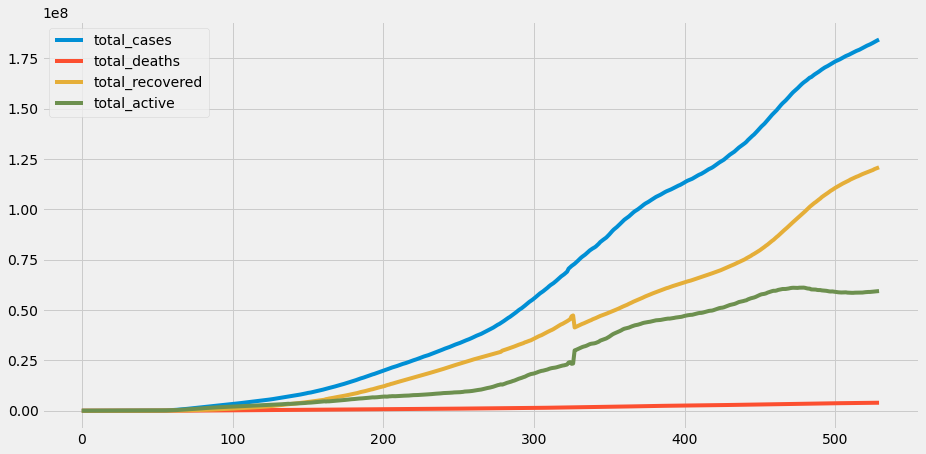

In [ ]:
total_df.plot(kind = 'line',
             figsize=(14,7))

In [ ]:
logtotal_df = np.log10(total_df)
logtotal_df

total_cases  total_deaths  total_recovered  total_active
0       2.745855      1.230449         1.477121      2.707570
1       2.817565      1.255273         1.505150      2.783189
2       2.974972      1.414973         1.591065      2.943989
3       3.157457      1.623249         1.623249      3.131298
4       3.326336      1.748188         1.748188      3.302764
..           ...           ...              ...           ...
525     8.261754      6.596624         8.077661      7.772142
526     8.262788      6.597561         8.079212      7.772137
527     8.263836      6.598478         8.080264      7.773186
528     8.264721      6.599233         8.081237      7.773902
529     8.265496      6.599956         8.082312      7.774068

[530 rows x 4 columns]

<AxesSubplot:>

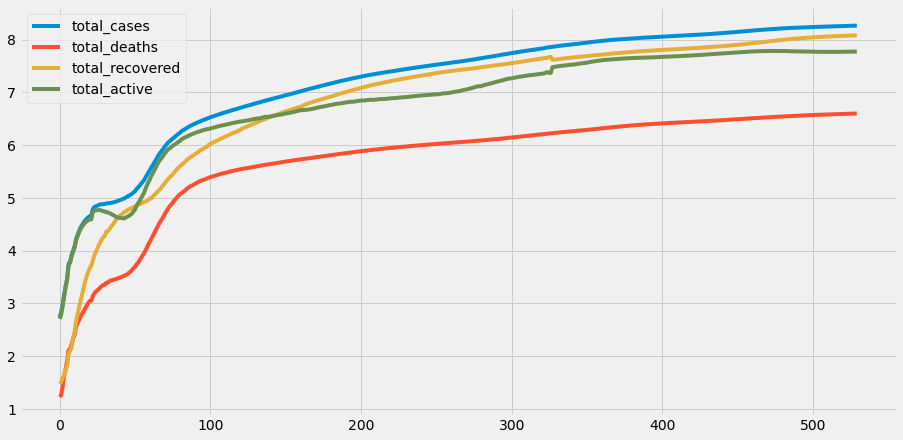

In [ ]:
logtotal_df.plot(kind = 'line',
             figsize=(14,7))

In [ ]:
#Insert your code here:



## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

Text(0.5, 0, 'Days')

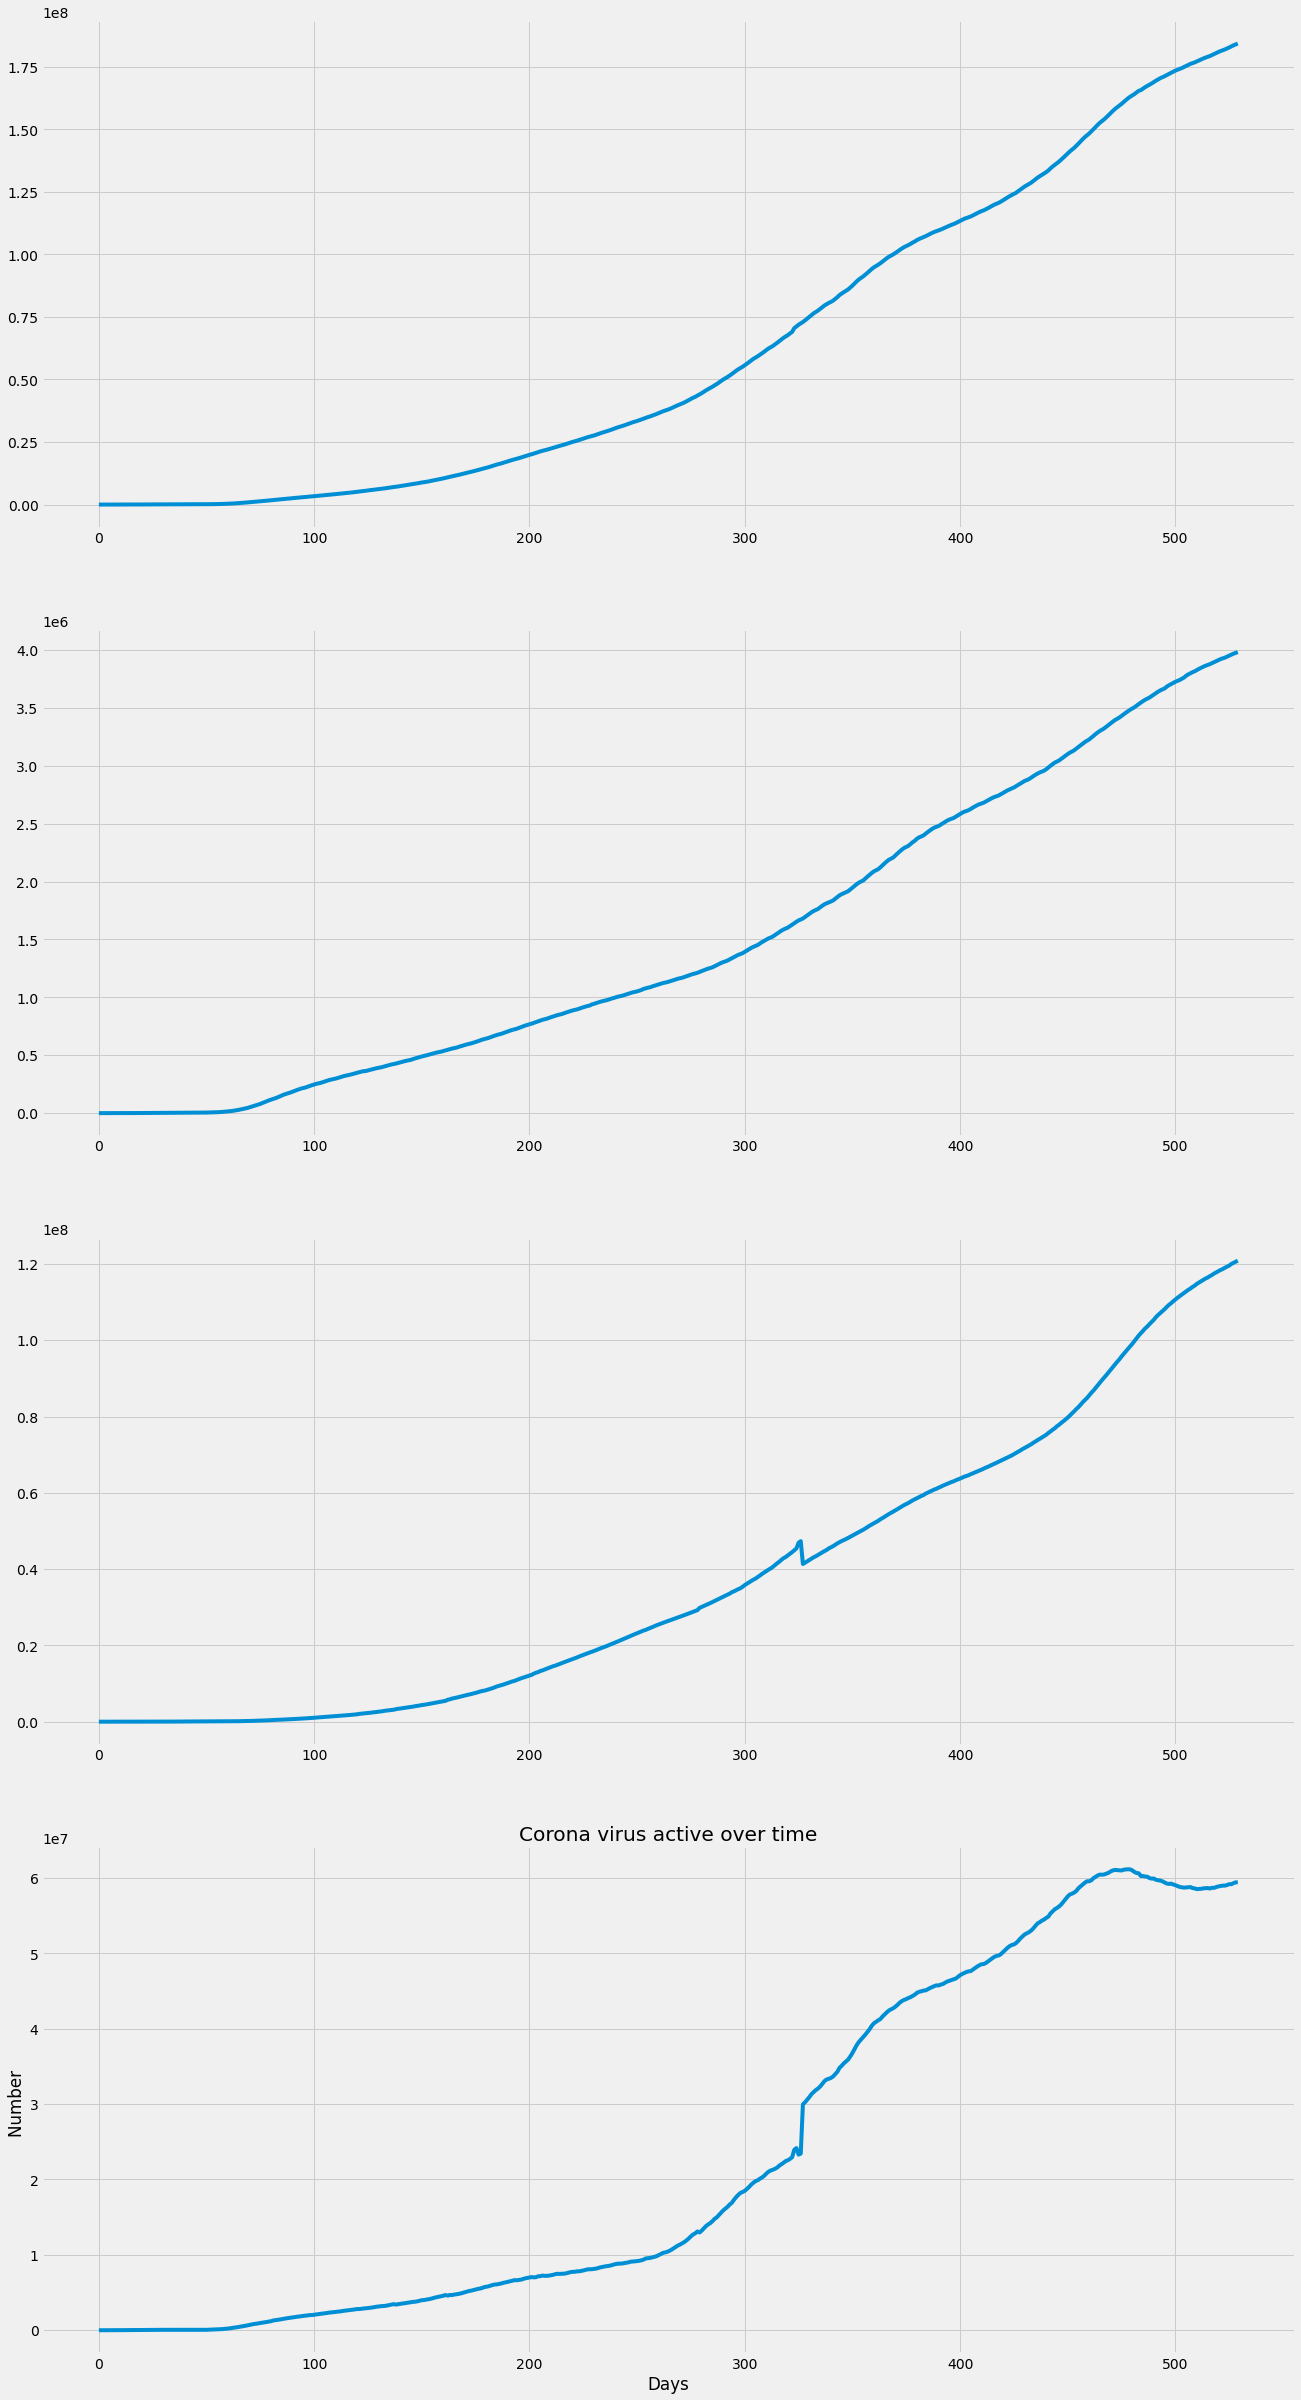

In [ ]:
#Set overall figure Size
fig = plt.figure(figsize=(20,40))

# Create Facet Grid 
ax0 = fig.add_subplot(4,1,1)
ax1 = fig.add_subplot(4,1,2)
ax2 = fig.add_subplot(4,1,3)
ax3 = fig.add_subplot(4,1,4)

total_df['total_cases'].plot(kind = 'line', ax=ax0)
plt.title('Corona virus cases over time')
plt.ylabel('Number ')
plt.xlabel('Days')

total_df['total_deaths'].plot(kind = 'line', ax=ax1)
plt.title('Corona virus deaths over time')
plt.ylabel('Number ')
plt.xlabel('Days')

total_df['total_recovered'].plot(kind = 'line', ax=ax2)
plt.title('Corona virus recovered over time')
plt.ylabel('Number ')
plt.xlabel('Days')

total_df['total_active'].plot(kind = 'line', ax=ax3)
plt.title('Corona virus active over time')
plt.ylabel('Number ')
plt.xlabel('Days')

In [ ]:
#Insert your code here:


## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [ ]:
total_df[0:1]

total_cases  total_deaths  total_recovered  total_active
0          557            17               30           510

In [ ]:
total_df[:-1]

total_cases  total_deaths  total_recovered  total_active
0            557            17               30           510
1            657            18               32           607
2            944            26               39           879
3           1437            42               42          1353
4           2120            56               56          2008
..           ...           ...              ...           ...
524    182306743       3941053        119299679      59066011
525    182706398       3950248        119580620      59175530
526    183142121       3958781        120008476      59174864
527    183584523       3967140        120299518      59317865
528    183959095       3974043        120569293      59415759

[529 rows x 4 columns]

In [ ]:
df_covid_previous_day = pd.concat([total_df[0:1], total_df[:-1]], axis=0, ignore_index=True)
df_covid_previous_day

total_cases  total_deaths  total_recovered  total_active
0            557            17               30           510
1            557            17               30           510
2            657            18               32           607
3            944            26               39           879
4           1437            42               42          1353
..           ...           ...              ...           ...
525    182306743       3941053        119299679      59066011
526    182706398       3950248        119580620      59175530
527    183142121       3958781        120008476      59174864
528    183584523       3967140        120299518      59317865
529    183959095       3974043        120569293      59415759

[530 rows x 4 columns]

In [ ]:
total_df

total_cases  total_deaths  total_recovered  total_active
0            557            17               30           510
1            657            18               32           607
2            944            26               39           879
3           1437            42               42          1353
4           2120            56               56          2008
..           ...           ...              ...           ...
525    182706398       3950248        119580620      59175530
526    183142121       3958781        120008476      59174864
527    183584523       3967140        120299518      59317865
528    183959095       3974043        120569293      59415759
529    184287346       3980669        120868181      59438496

[530 rows x 4 columns]

In [ ]:
df_covid_daily_increases = total_df - df_covid_previous_day

df_covid_daily_increases

total_cases  total_deaths  total_recovered  total_active
0              0             0                0             0
1            100             1                2            97
2            287             8                7           272
3            493            16                3           474
4            683            14               14           655
..           ...           ...              ...           ...
525       399655          9195           280941        109519
526       435723          8533           427856          -666
527       442402          8359           291042        143001
528       374572          6903           269775         97894
529       328251          6626           298888         22737

[530 rows x 4 columns]

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

Text(0.5, 1.0, 'World daily increases')

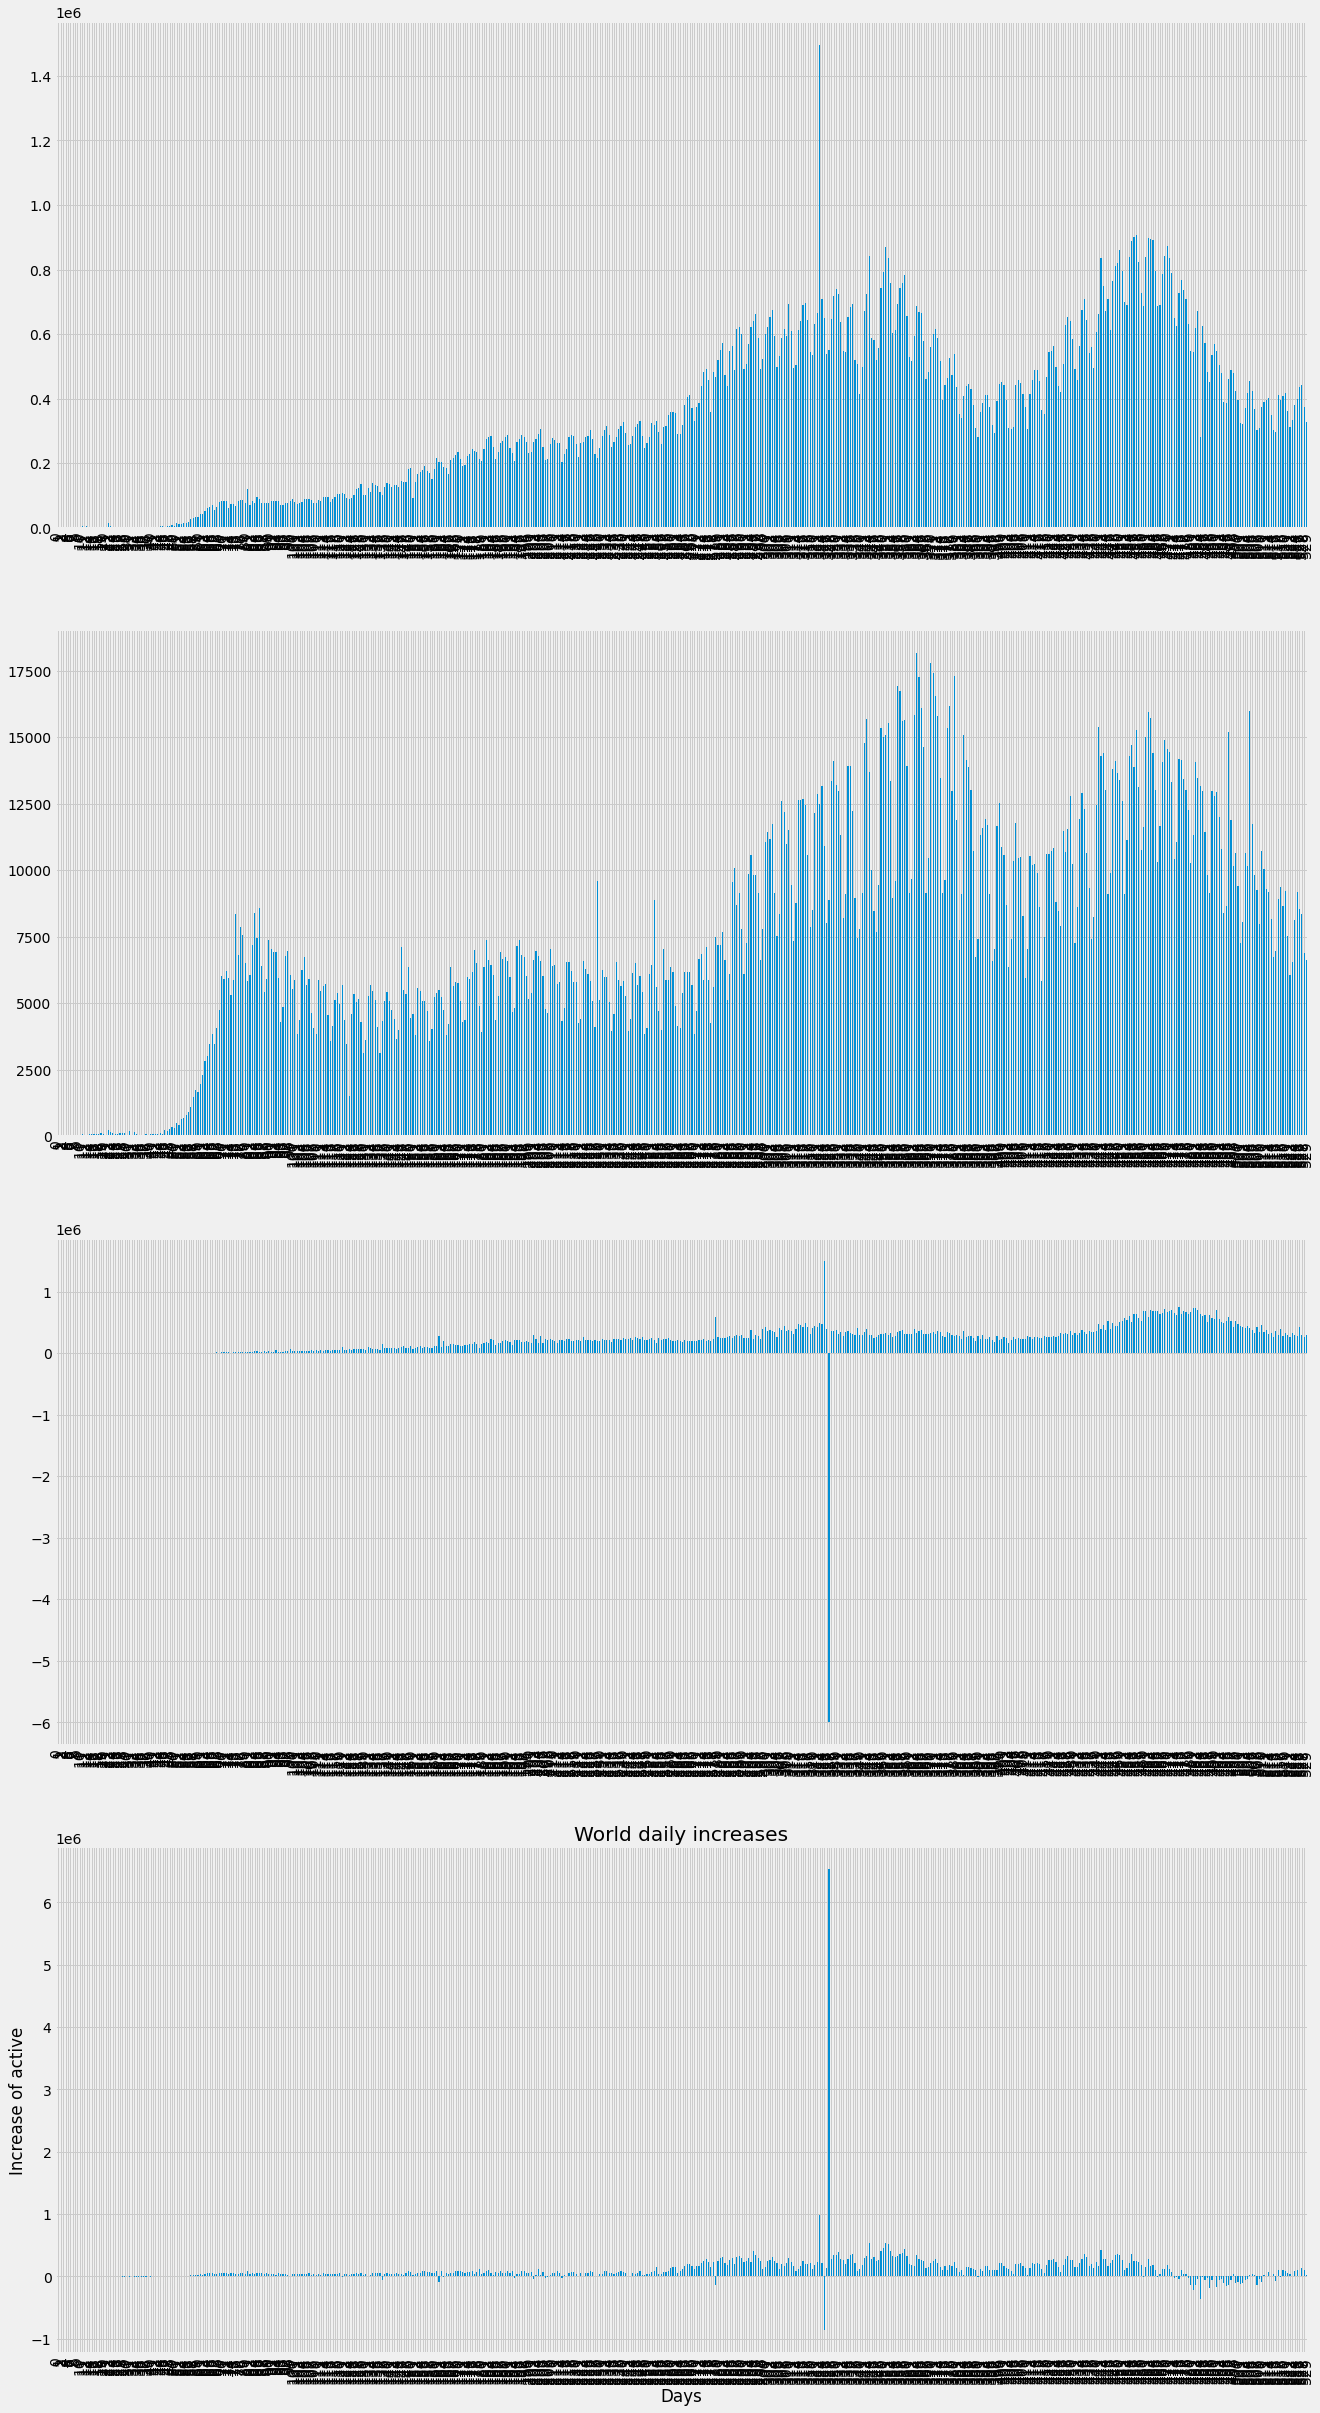

In [ ]:

#Set overall figure Size
fig = plt.figure(figsize=(20,40))

# Create Facet Grid 
ax0 = fig.add_subplot(4,1,1)
ax1 = fig.add_subplot(4,1,2)
ax2 = fig.add_subplot(4,1,3)
ax3 = fig.add_subplot(4,1,4)


df_covid_daily_increases['total_cases'].plot(kind='bar', ax=ax0)
plt.xlabel('Days') # add to x-label to the plot
plt.ylabel('Increase of cases') # add y-label to the plot
plt.title('World daily increases') # add title to the plot

df_covid_daily_increases['total_deaths'].plot(kind='bar', ax=ax1)
plt.xlabel('Days') # add to x-label to the plot
plt.ylabel('Increase of deaths') # add y-label to the plot
plt.title('World daily increases') # add title to the plot


df_covid_daily_increases['total_recovered'].plot(kind='bar', ax=ax2)
plt.xlabel('Days') # add to x-label to the plot
plt.ylabel('Increase of recovered') # add y-label to the plot
plt.title('World daily increases') # add title to the plot


df_covid_daily_increases['total_active'].plot(kind='bar', ax=ax3)
plt.xlabel('Days') # add to x-label to the plot
plt.ylabel('Increase of active') # add y-label to the plot
plt.title('World daily increases') # add title to the plot



# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [ ]:
total1_cases=[]
total1_deaths=[]
total1_recovered=[]
mortality =[]
recovered_rate=[]



for date in dates:
    total_case = confirmed[date].sum()
    total1_cases.append(total_case)
    
    total_death = deaths[date].sum()
    total1_deaths.append(total_death)

    total_recover = recoveries[date].sum()
    total1_recovered.append(total_recover)
    
    deathrate = (total_death / total_case)*100
    mortality.append(deathrate)
    
    recoveredrate = (total_recover / total_case)*100
    recovered_rate.append(recoveredrate)
    
mortality

[3.052064631956912,
 2.73972602739726,
 2.754237288135593,
 2.9227557411273484,
 2.6415094339622645,
 2.799590303857972,
 2.347670250896057,
 2.1559409952990762,
 2.075998543158917,
 2.1456633423995166,
 2.1515201860774216,
 2.1564305712753917,
 2.1421028812792278,
 2.0586635424076323,
 2.040225727101722,
 2.0580406414334873,
 2.0901162790697674,
 2.1706929519808247,
 2.255863751805189,
 2.3684272053494193,
 2.483598875351453,
 2.4717014503006722,
 2.2704689984101747,
 2.2761238641798185,
 2.412569690826153,
 2.484628990145709,
 2.549370163634627,
 2.671811589381944,
 2.806159540017183,
 2.9495119135089745,
 2.930536397470265,
 3.128180337879096,
 3.1269780984934803,
 3.3057643480228265,
 3.3701437596378647,
 3.4048461614076477,
 3.4015085581665216,
 3.4140602718889625,
 3.421178057031259,
 3.390194791973032,
 3.4143966719036976,
 3.3980686926038244,
 3.414956565529397,
 3.4153855570404077,
 3.394568298400306,
 3.3613603800618357,
 3.462734896581834,
 3.498009014133812,
 3.589218066206

In [ ]:
mortality_mean = np.mean(mortality)
print(mortality_mean)

recovered_rate_mean = np.mean(recovered_rate)
print(recovered_rate_mean)

3.43227167559655
51.98132789245268


In [ ]:
mortality = pd.DataFrame(list(zip(mortality)), index=dates, columns=['mortality'])


recovered_rate = pd.DataFrame(list(zip(recovered_rate)), index=dates, columns=['recovered_rate'])



mortality

mortality
1/22/20   3.052065
1/23/20   2.739726
1/24/20   2.754237
1/25/20   2.922756
1/26/20   2.641509
...            ...
6/30/21   2.162074
7/1/21    2.161590
7/2/21    2.160934
7/3/21    2.160286
7/4/21    2.160034

[530 rows x 1 columns]

In [ ]:
#Insert your code here:


# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

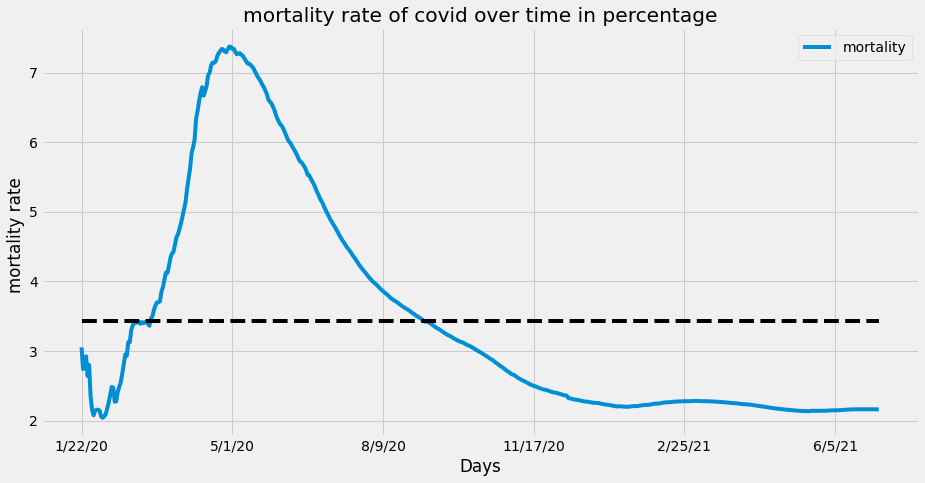

In [ ]:
mortality.plot(kind = 'line',
             figsize=(14,7))

avg_arr = [mortality_mean for i in range(len(mortality))] # Create average array
# Plot the average line to the chart
plt.plot(avg_arr, ls="--", color='k', label=f"Average:y={mortality_mean}")

plt.title('mortality rate of covid over time in percentage')
plt.ylabel('mortality rate ')
plt.xlabel('Days')

plt.show()

In [ ]:
#Insert your code here:



**7.2** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

Text(0.5, 0, 'Days')

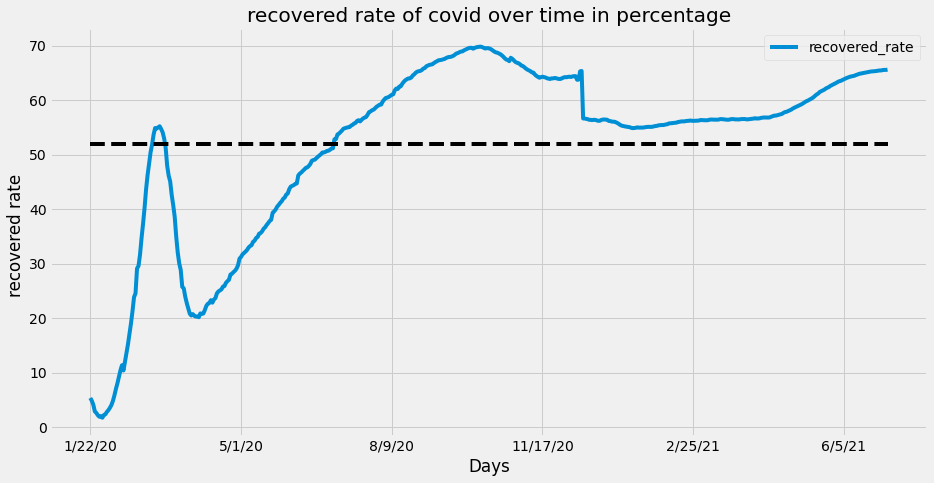

In [ ]:
#Insert your code here:
recovered_rate.plot(kind = 'line',
             figsize=(14,7))

avg_arr = [recovered_rate_mean for i in range(len(recovered_rate))] # Create average array
# Plot the average line to the chart
plt.plot(avg_arr, ls="--", color='k', label=f"Average:y={recovered_rate_mean}")

plt.title('recovered rate of covid over time in percentage')
plt.ylabel('recovered rate ')
plt.xlabel('Days')

#  5. Continent Analysis

In [ ]:
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


## Data Prerocessing

In [ ]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [ ]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [ ]:
adjust_confirmed_df = confirmed_df.iloc[0:,0:500]
country_name= adjust_confirmed_df ['Country/Region']
lst=[]
for i in country_name:
    try: 
            lst.append(country_to_continent(i))
    except:
            lst.append('na')
adjust_confirmed_df.insert(1,'Continents',lst)

In [ ]:
adjust_confirmed_df

Province/State Continents        Country/Region        Lat        Long  \
0              NaN       Asia           Afghanistan  33.939110   67.709953   
1              NaN     Europe               Albania  41.153300   20.168300   
2              NaN     Africa               Algeria  28.033900    1.659600   
3              NaN     Europe               Andorra  42.506300    1.521800   
4              NaN     Africa                Angola -11.202700   17.873900   
..             ...        ...                   ...        ...         ...   
280            NaN         na    West Bank and Gaza  31.952200   35.233200   
281            NaN         na  Winter Olympics 2022  39.904200  116.407400   
282            NaN       Asia                 Yemen  15.552727   48.516388   
283            NaN     Africa                Zambia -13.133897   27.849332   
284            NaN     Africa              Zimbabwe -19.015438   29.154857   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  5/22/21  5/23/21  \
0          0        0        0        0        0  ...    65486    65728   
1          0        0        0        0        0  ...   132176   132209   
2          0        0        0        0        0  ...   126651   126860   
3          0        0        0        0        0  ...    13569    13569   
4          0        0        0        0        0  ...    32149    32441   
..       ...      ...      ...      ...      ...  ...      ...      ...   
280        0        0        0        0        0  ...   305201   305201   
281        0        0        0        0        0  ...        0        0   
282        0        0        0        0        0  ...     6649     6658   
283        0        0        0        0        0  ...    93106    93201   
284        0        0        0        0        0  ...    38679    38682   

     5/24/21  5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  5/30/21  5/31/21  
0      66275    66903    67743    68366    69130    70111    70761    71838  
1     132215   132229   132244   132264   132285   132297   132309   132315  
2     127107   127361   127646   127926   128198   128456   128725   128913  
3      13569    13664    13671    13682    13693    13693    13693    13727  
4      32623    32933    33338    33607    33944    34180    34366    34551  
..       ...      ...      ...      ...      ...      ...      ...      ...  
280   305777   306334   306795   306795   307569   307838   308048   308350  
281        0        0        0        0        0        0        0        0  
282     6662     6670     6688     6696     6723     6731     6737     6742  
283    93279    93428    93627    93947    94430    94751    95050    95263  
284    38696    38706    38819    38854    38918    38933    38944    38961  

[285 rows x 501 columns]

In [ ]:
adjust_deaths_df = deaths_df.iloc[0:,0:500]
country_name= adjust_deaths_df ['Country/Region']
lst=[]
for i in country_name:
    try: 
            lst.append(country_to_continent(i))
    except:
            lst.append('na')
adjust_deaths_df.insert(1,'Continents',lst)

In [ ]:
adjust_recoveries_df = recoveries_df.iloc[0:,0:500]
country_name= adjust_recoveries_df ['Country/Region']
lst=[]
for i in country_name:
    try: 
            lst.append(country_to_continent(i))
    except:
            lst.append('na')
adjust_recoveries_df.insert(1,'Continents',lst)

adjust_recoveries_df = recoveries_df.iloc[0:,0:500]
country_name= adjust_recoveries_df ['Country/Region']
lst=[]
for i in country_name:
    try: 
            lst.append(country_to_continent(i))
    except:
            lst.append('na')
adjust_recoveries_df.insert(1,'Continents',lst)

In [ ]:
adjust_recoveries_df

Province/State Continents        Country/Region        Lat        Long  \
0              NaN       Asia           Afghanistan  33.939110   67.709953   
1              NaN     Europe               Albania  41.153300   20.168300   
2              NaN     Africa               Algeria  28.033900    1.659600   
3              NaN     Europe               Andorra  42.506300    1.521800   
4              NaN     Africa                Angola -11.202700   17.873900   
..             ...        ...                   ...        ...         ...   
265            NaN         na    West Bank and Gaza  31.952200   35.233200   
266            NaN         na  Winter Olympics 2022  39.904200  116.407400   
267            NaN       Asia                 Yemen  15.552727   48.516388   
268            NaN     Africa                Zambia -13.133897   27.849332   
269            NaN     Africa              Zimbabwe -19.015438   29.154857   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  5/22/21  5/23/21  \
0          0        0        0        0        0  ...    55889    56035   
1          0        0        0        0        0  ...   128601   128732   
2          0        0        0        0        0  ...    88208    88346   
3          0        0        0        0        0  ...    13234    13234   
4          0        0        0        0        0  ...    26775    26778   
..       ...      ...      ...      ...      ...  ...      ...      ...   
265        0        0        0        0        0  ...   297201   297201   
266        0        0        0        0        0  ...        0        0   
267        0        0        0        0        0  ...     3201     3245   
268        0        0        0        0        0  ...    91102    91156   
269        0        0        0        0        0  ...    36445    36453   

     5/24/21  5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  5/30/21  5/31/21  
0      56295    56518    56711    56962    57119    57281    57450    57629  
1     128826   128907   128978   129042   129097   129215   129308   129431  
2      88497    88672    88861    89040    89232    89419    89625    89839  
3      13234    13263    13381    13405    13416    13416    13416    13458  
4      27087    27204    27467    27529    27577    27646    27766    28079  
..       ...      ...      ...      ...      ...      ...      ...      ...  
265   298502   299024   299559   299559   300125   300524   300661   300776  
266        0        0        0        0        0        0        0        0  
267     3260     3273     3306     3339     3375     3399     3427     3445  
268    91200    91221    91239    91321    91443    91594    91752    91956  
269    36471    36517    36531    36541    36563    36578    36591    36594  

[270 rows x 501 columns]

In [ ]:
#Insert your code here:


# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [ ]:
#Insert your code here:


In [ ]:
# Create countries infor df
list_countries = adjust_confirmed_df.drop_duplicates(['Country/Region'])
list_countries.set_index(['Country/Region'], inplace=True)
countries_info = list_countries[['Lat', 'Long', 'Continents']]

# Create confirmed cases by country df
list_confirmed = adjust_confirmed_df.groupby(['Country/Region']).sum()     
countries_confirmed = list_confirmed.iloc[:,-1]

# Create deaths cases by country df
list_deaths = adjust_deaths_df.groupby(['Country/Region']).sum()
countries_deaths = list_deaths.iloc[:,-1]

# Create recoveries cases by country df
list_recoveries = adjust_recoveries_df.groupby(['Country/Region']).sum()
countries_recoveries = list_recoveries.iloc[:,-1]

# Naming all column above
countries_confirmed.name = 'Confirmed'
countries_deaths.name = 'Deaths'
countries_recoveries.name = 'Recoveries'


# Create requirement table
countries_df = pd.concat([countries_info, countries_confirmed, countries_deaths, countries_recoveries], axis=1) 


# Calculate Active and Mortality Rate
countries_df['Active'] = countries_df['Confirmed'] - (countries_df['Deaths'] + countries_df['Recoveries'])
countries_df['Mortality Rate'] = round((countries_df['Deaths'] * 100)/countries_df['Confirmed'], 2)
countries_df['Recoveries Rate'] = (countries_df['Recoveries'] / countries_df['Confirmed'])*100


# Check error value 
countries_df[countries_df['Active'] < 0]                  # Active column contain 2 negative value
countries_df.drop(['Peru','Austria'], inplace=True)       # Drop two countries have an Error data

# Check missing data
countries_df.isna().sum()                    # Mortality Rate column contain 1 missing value
countries_df.dropna(inplace=True)            # Drop nan rows


countries_df

Lat        Long Continents  Confirmed  Deaths  \
Country/Region                                                            
Afghanistan         33.939110   67.709953       Asia      71838    2944   
Albania             41.153300   20.168300     Europe     132315    2451   
Algeria             28.033900    1.659600     Africa     128913    3472   
Andorra             42.506300    1.521800     Europe      13727     127   
Angola             -11.202700   17.873900     Africa      34551     766   
...                       ...         ...        ...        ...     ...   
Vietnam             14.058324  108.277199       Asia       7432      47   
West Bank and Gaza  31.952200   35.233200         na     308350    3497   
Yemen               15.552727   48.516388       Asia       6742    1321   
Zambia             -13.133897   27.849332     Africa      95263    1281   
Zimbabwe           -19.015438   29.154857     Africa      38961    1594   

                    Recoveries  Active  Mortality Rate  Recoveries Rate  
Country/Region                                                           
Afghanistan              57629   11265            4.10        80.220775  
Albania                 129431     433            1.85        97.820353  
Algeria                  89839   35602            2.69        69.689636  
Andorra                  13458     142            0.93        98.040358  
Angola                   28079    5706            2.22        81.268270  
...                        ...     ...             ...              ...  
Vietnam                   3029    4356            0.63        40.756189  
West Bank and Gaza      300776    4077            1.13        97.543700  
Yemen                     3445    1976           19.59        51.097597  
Zambia                   91956    2026            1.34        96.528558  
Zimbabwe                 36594     773            4.09        93.924694  

[191 rows x 9 columns]

# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [ ]:
#Insert your code here:


In [ ]:
# Group all countries same continent
continent_confirmed = adjust_confirmed_df.groupby('Continents').sum()
continent_deaths = adjust_deaths_df.groupby('Continents').sum()
continent_recoveries = adjust_recoveries_df.groupby('Continents').sum()

# Sum total confirmed, total deaths, total recoveries by continent in the latest day 
df_confirmed = continent_confirmed.iloc[:,-1]
df_deaths = continent_deaths.iloc[:,-1]
df_recoveries = continent_recoveries.iloc[:,-1]

# Naming three Series above
df_confirmed.name = 'Confirmed'
df_deaths.name = 'Deaths'
df_recoveries.name = 'Recoveries'

# Create continents dataframe
continents_df = pd.concat([df_confirmed, df_deaths, df_recoveries], axis=1)    

# Calculate Active case and Mortality Rate
continents_df['Active'] = continents_df['Confirmed'] - (continents_df['Deaths'] + continents_df['Recoveries'])
continents_df['Mortality Rate'] = round((continents_df['Deaths']  * 100)/continents_df['Confirmed'], 2)
continents_df['Recoveries Rate'] = (continents_df['Recoveries'] / continents_df['Confirmed'])*100

#Rename
continents_df.rename({'na':'Others'}, inplace=True)

continents_df

Confirmed   Deaths  Recoveries    Active  Mortality Rate  \
Continents                                                                
Africa           4840331   130634     4336274    373423            2.70   
Asia            50889352   683054    46823929   3382369            1.34   
Europe          47078749  1073911    25913624  20091214            2.28   
North America   39005283   874403     4724266  33406614            2.24   
Oceania            49174     1103       41478      6593            2.24   
South America   28799217   895089    25779265   2124863            3.11   
Others            566723     8993      540930     16800            1.59   

               Recoveries Rate  
Continents                      
Africa               89.586311  
Asia                 92.011250  
Europe               55.043145  
North America        12.111862  
Oceania              84.349453  
South America        89.513770  
Others               95.448747

## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [ ]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["Continents",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

In [ ]:
#Insert your code here:


In [ ]:
adjust_confirmed_df['Continents'].value_counts ()

Asia             77
Europe           73
Africa           54
North America    38
Oceania          20
South America    12
na               11
Name: Continents, dtype: int64

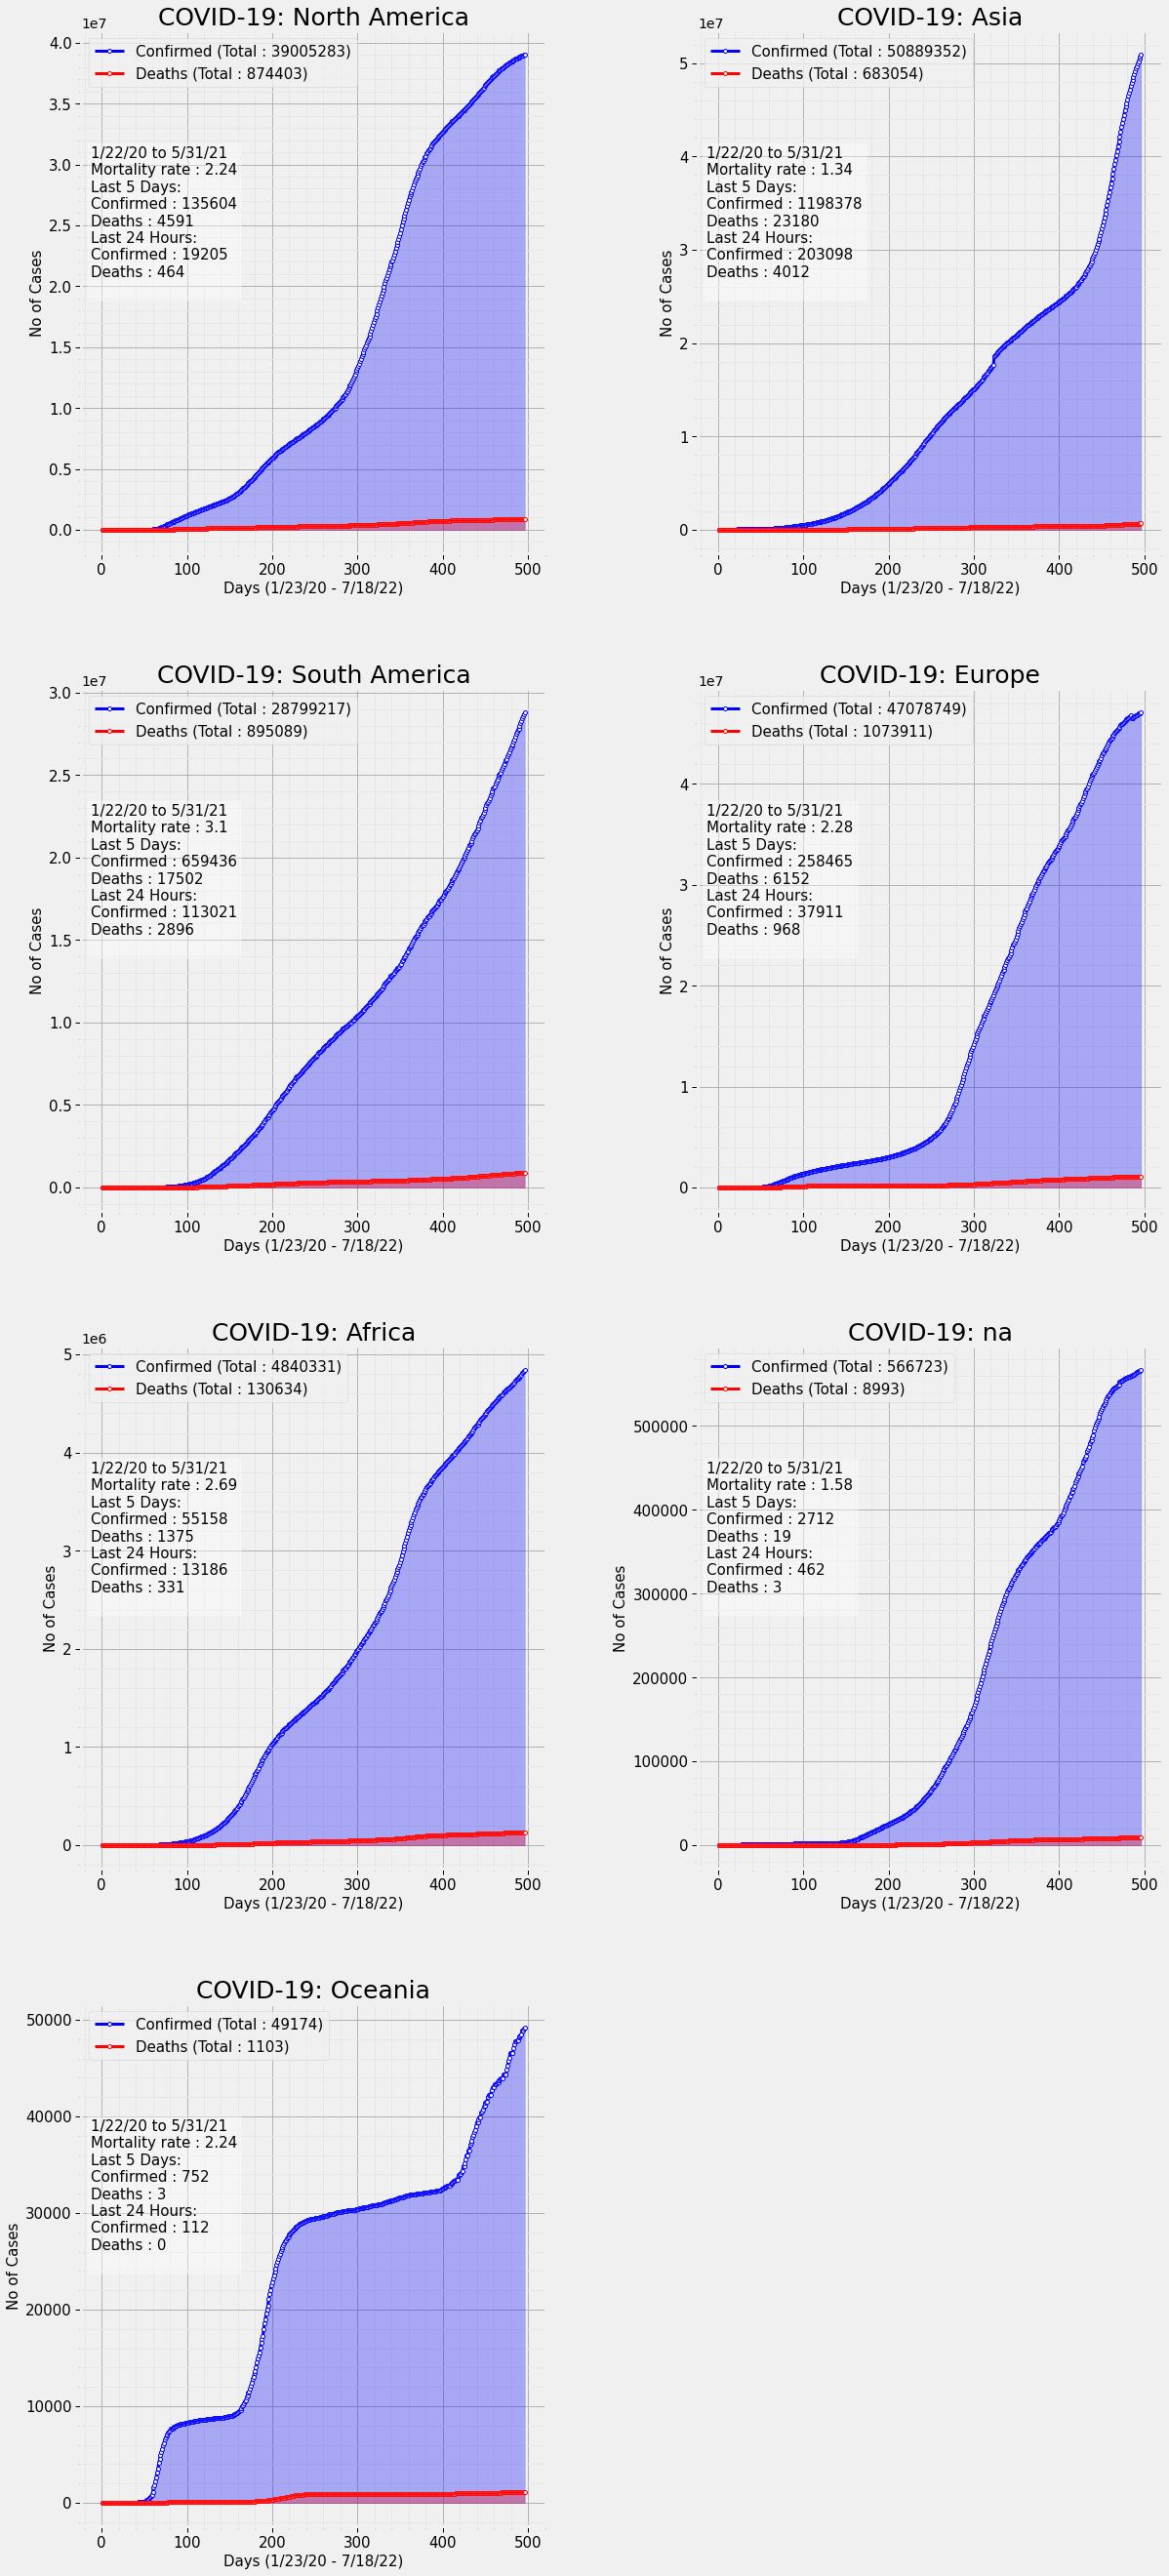

In [ ]:
# Create 7 subplots
figure = plt.figure(figsize=(20,40))
fig1=[figure, 4, 2, 1]
fig2=[figure, 4, 2, 2]
fig3=[figure, 4, 2, 3]
fig4=[figure, 4, 2, 4]
fig5=[figure, 4, 2, 5]
fig6=[figure, 4, 2, 6]
fig7=[figure, 4, 2, 7]


# Ploting covid cases of 7 continent
visualize_covid_cases(adjust_confirmed_df, adjust_deaths_df,figure=fig1, continent= 'North America')
visualize_covid_cases(adjust_confirmed_df, adjust_deaths_df,figure=fig2, continent= 'Asia')
visualize_covid_cases(adjust_confirmed_df, adjust_deaths_df,figure=fig3, continent= 'South America')
visualize_covid_cases(adjust_confirmed_df, adjust_deaths_df,figure=fig4, continent= 'Europe')
visualize_covid_cases(adjust_confirmed_df, adjust_deaths_df,figure=fig5, continent= 'Africa')
visualize_covid_cases(adjust_confirmed_df, adjust_deaths_df,figure=fig6, continent= 'na')
visualize_covid_cases(adjust_confirmed_df, adjust_deaths_df,figure=fig7, continent= 'Oceania')


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

In [ ]:
def visualize_covid_cases2(confirmed, deaths,recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths","Recoveries"]
    if continent != None:
        params = ["Continents",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        

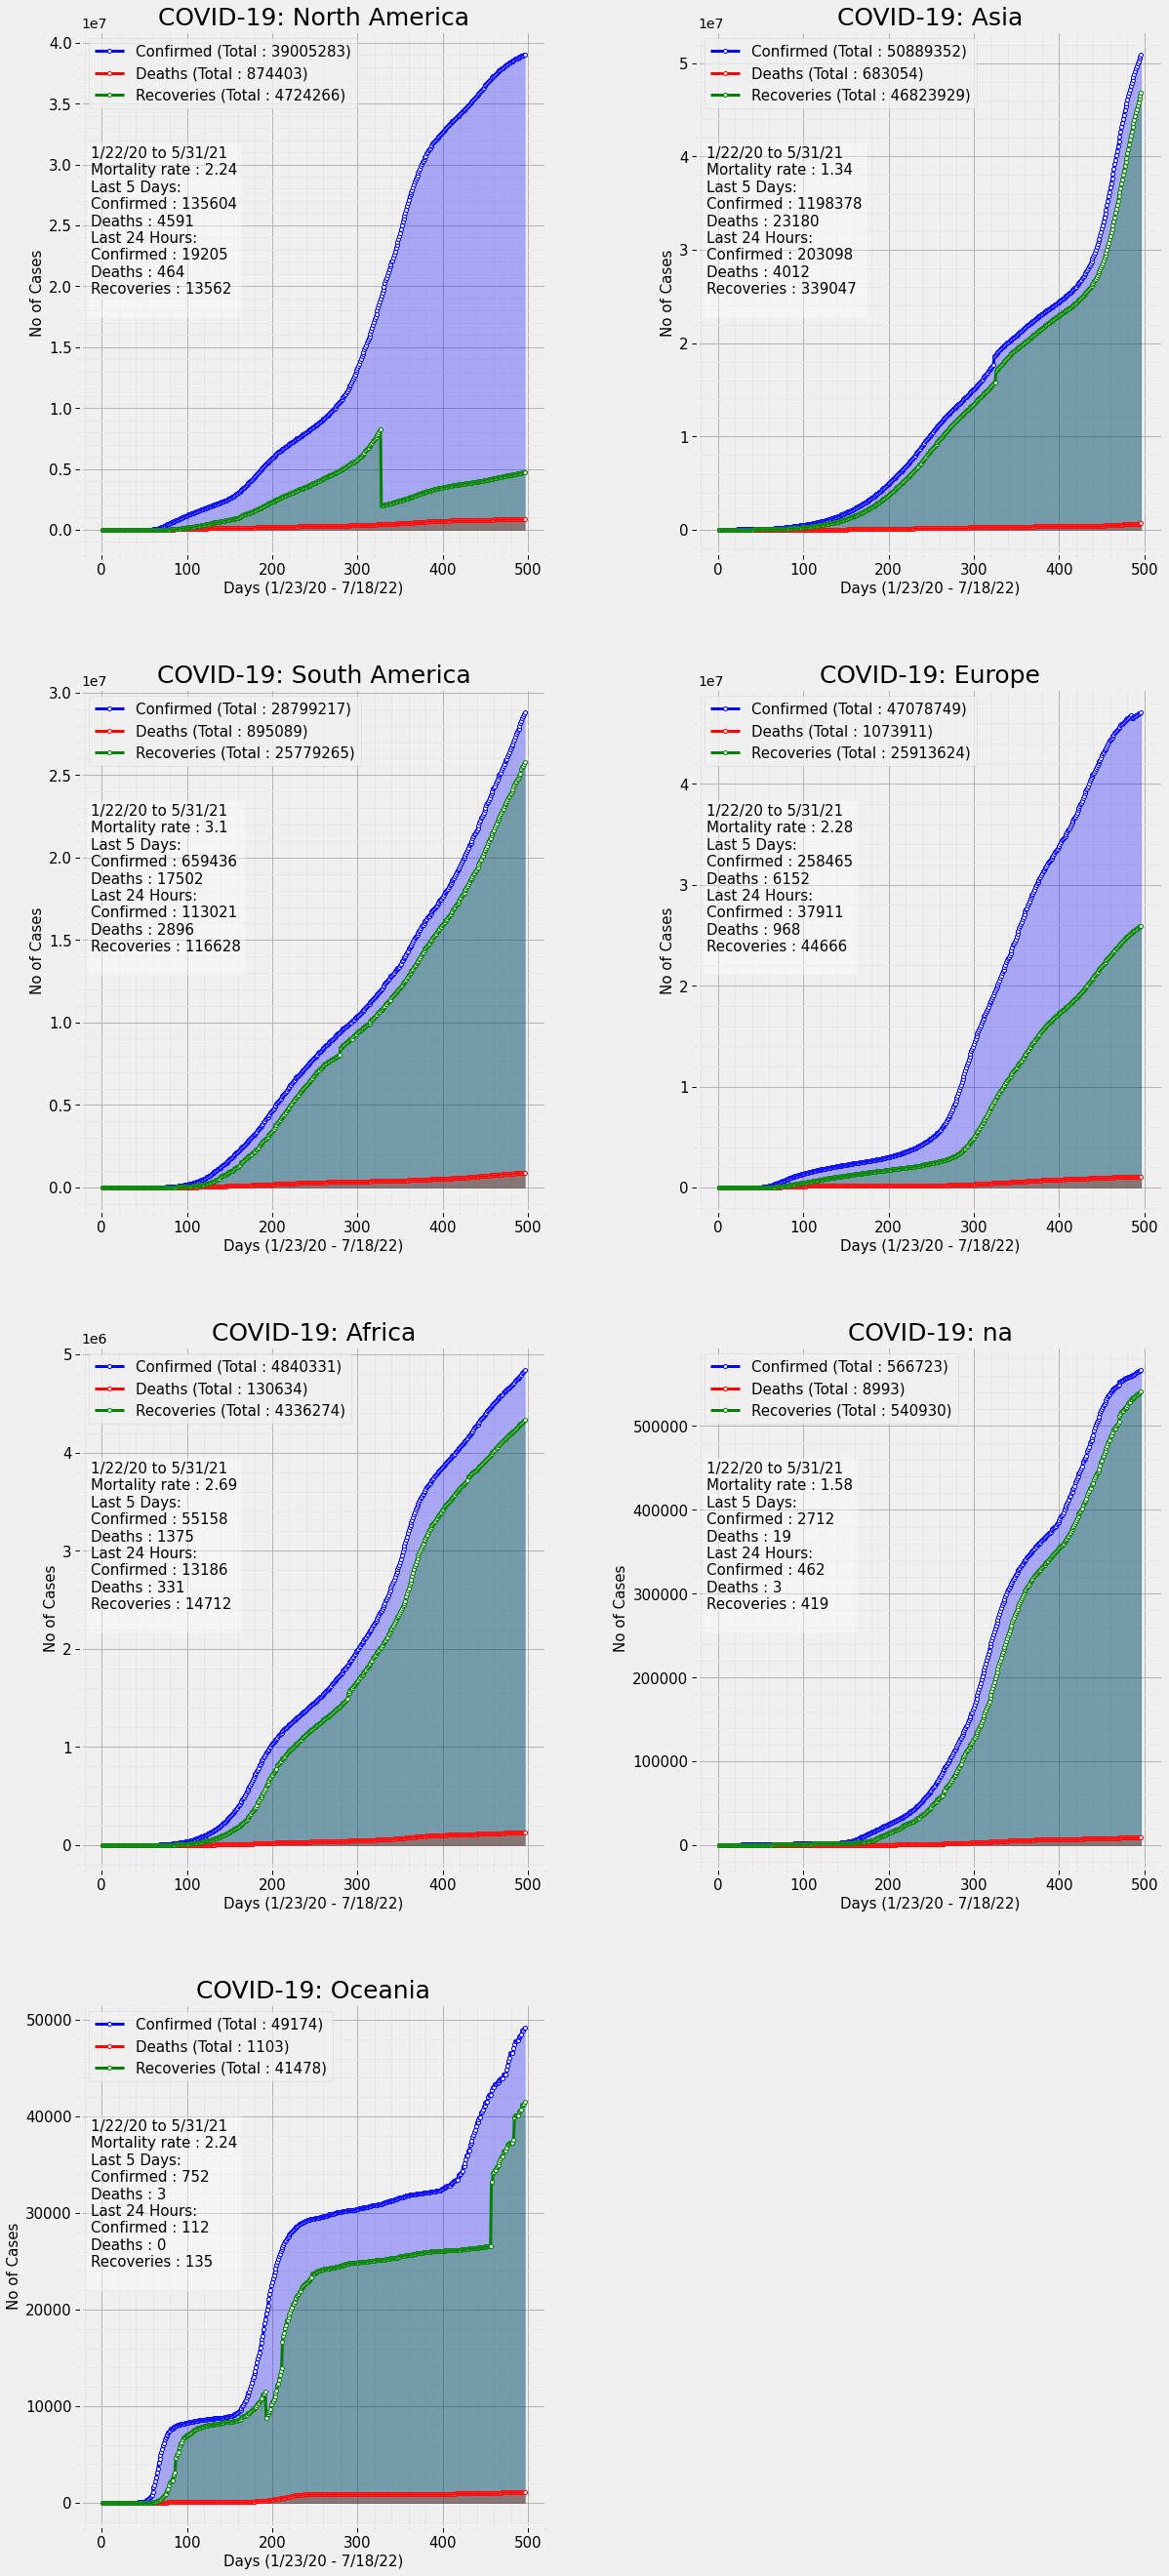

In [ ]:
# Create 7 subplots
figure = plt.figure(figsize=(20,40))
fig1=[figure, 4, 2, 1]
fig2=[figure, 4, 2, 2]
fig3=[figure, 4, 2, 3]
fig4=[figure, 4, 2, 4]
fig5=[figure, 4, 2, 5]
fig6=[figure, 4, 2, 6]
fig7=[figure, 4, 2, 7]


# # Ploting covid cases of 7 continent
visualize_covid_cases2(adjust_confirmed_df, adjust_deaths_df, adjust_recoveries_df, figure=fig1, continent= 'North America')
visualize_covid_cases2(adjust_confirmed_df, adjust_deaths_df, adjust_recoveries_df, figure=fig2, continent= 'Asia')
visualize_covid_cases2(adjust_confirmed_df, adjust_deaths_df, adjust_recoveries_df, figure=fig3, continent= 'South America')
visualize_covid_cases2(adjust_confirmed_df, adjust_deaths_df, adjust_recoveries_df, figure=fig4, continent= 'Europe')
visualize_covid_cases2(adjust_confirmed_df, adjust_deaths_df, adjust_recoveries_df, figure=fig5, continent= 'Africa')
visualize_covid_cases2(adjust_confirmed_df, adjust_deaths_df, adjust_recoveries_df, figure=fig6, continent= 'na')
visualize_covid_cases2(adjust_confirmed_df, adjust_deaths_df, adjust_recoveries_df, figure=fig7, continent= 'Oceania')

In [ ]:
#Insert your code here:


# Problem 12
    Visualize the covariance matrix for continents_df.

In [ ]:
#Insert your code here:

In [ ]:
problem12_continent = continents_df.copy(deep = True)
problem12_continent

Confirmed   Deaths  Recoveries    Active  Mortality Rate  \
Continents                                                                
Africa           4840331   130634     4336274    373423            2.70   
Asia            50889352   683054    46823929   3382369            1.34   
Europe          47078749  1073911    25913624  20091214            2.28   
North America   39005283   874403     4724266  33406614            2.24   
Oceania            49174     1103       41478      6593            2.24   
South America   28799217   895089    25779265   2124863            3.11   
Others            566723     8993      540930     16800            1.59   

               Recoveries Rate  
Continents                      
Africa               89.586311  
Asia                 92.011250  
Europe               55.043145  
North America        12.111862  
Oceania              84.349453  
South America        89.513770  
Others               95.448747

In [ ]:
problem12_continent.corr() #change to correlation number

Confirmed    Deaths  Recoveries    Active  Mortality Rate  \
Confirmed         1.000000  0.906512    0.799250  0.586800       -0.155378   
Deaths            0.906512  1.000000    0.626926  0.658072        0.211803   
Recoveries        0.799250  0.626926    1.000000 -0.017578       -0.220623   
Active            0.586800  0.658072   -0.017578  1.000000        0.027226   
Mortality Rate   -0.155378  0.211803   -0.220623  0.027226        1.000000   
Recoveries Rate  -0.454974 -0.545630    0.165602 -0.980272       -0.092607   

                 Recoveries Rate  
Confirmed              -0.454974  
Deaths                 -0.545630  
Recoveries              0.165602  
Active                 -0.980272  
Mortality Rate         -0.092607  
Recoveries Rate         1.000000

In [ ]:
problem12_continent.cov()  #change to covariance number

Confirmed        Deaths    Recoveries        Active  \
Confirmed        4.987035e+14  9.356034e+12  3.175146e+14  1.718329e+14   
Deaths           9.356034e+12  2.135966e+11  5.154344e+12  3.988093e+12   
Recoveries       3.175146e+14  5.154344e+12  3.164606e+14 -4.100354e+12   
Active           1.718329e+14  3.988093e+12 -4.100354e+12  1.719451e+14   
Mortality Rate  -2.100123e+06  5.924676e+04 -2.375450e+06  2.160798e+05   
Recoveries Rate -3.094226e+08 -7.679615e+06  8.971585e+07 -3.914588e+08   

                 Mortality Rate  Recoveries Rate  
Confirmed         -2.100123e+06    -3.094226e+08  
Deaths             5.924676e+04    -7.679615e+06  
Recoveries        -2.375450e+06     8.971585e+07  
Active             2.160798e+05    -3.914588e+08  
Mortality Rate     3.663286e-01    -1.706957e+00  
Recoveries Rate   -1.706957e+00     9.274464e+02

<AxesSubplot:>

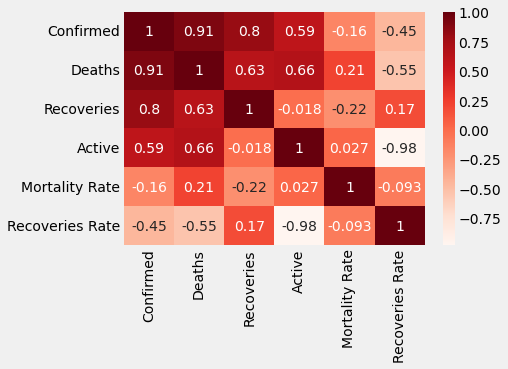

In [ ]:
sns.heatmap(problem12_continent.corr(), cmap = 'Reds', annot = True)

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

In [ ]:
problem13_continent = continents_df.copy(deep = True)
problem13_continent

Confirmed   Deaths  Recoveries    Active  Mortality Rate  \
Continents                                                                
Africa           4840331   130634     4336274    373423            2.70   
Asia            50889352   683054    46823929   3382369            1.34   
Europe          47078749  1073911    25913624  20091214            2.28   
North America   39005283   874403     4724266  33406614            2.24   
Oceania            49174     1103       41478      6593            2.24   
South America   28799217   895089    25779265   2124863            3.11   
Others            566723     8993      540930     16800            1.59   

               Recoveries Rate  
Continents                      
Africa               89.586311  
Asia                 92.011250  
Europe               55.043145  
North America        12.111862  
Oceania              84.349453  
South America        89.513770  
Others               95.448747

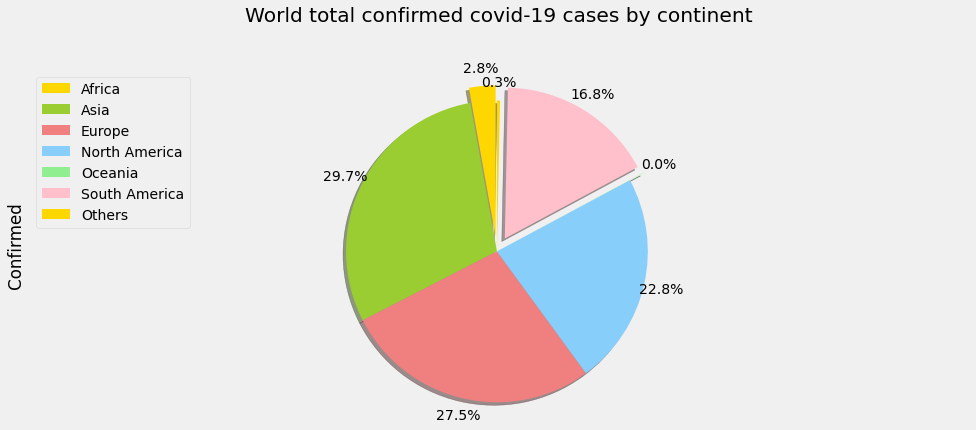

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1,0] # ratio for each continent with which to offset each wedge.

problem13_continent['Confirmed'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )
plt.title('World total confirmed covid-19 cases by continent', y=1.12) 
plt.axis('equal') 
plt.legend(labels=problem13_continent.index, loc='upper left') 





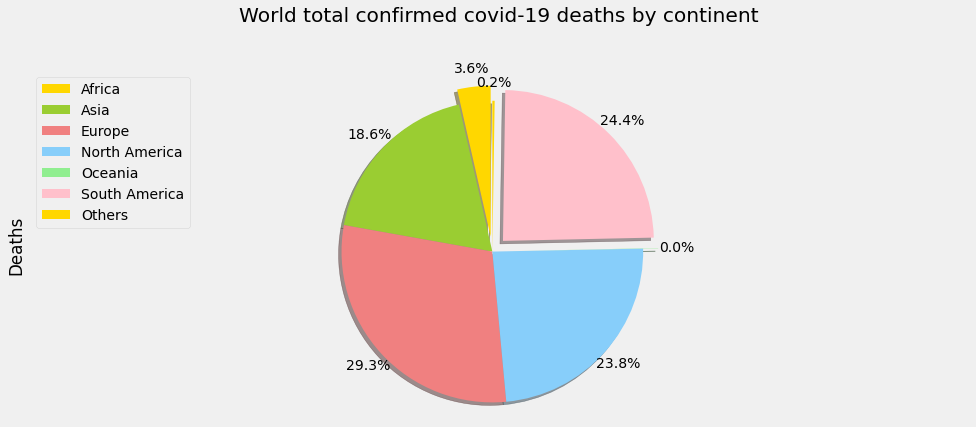

In [ ]:

problem13_continent['Deaths'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )
plt.title('World total confirmed covid-19 deaths by continent', y=1.12) 
plt.axis('equal') 
plt.legend(labels=problem13_continent.index, loc='upper left') 


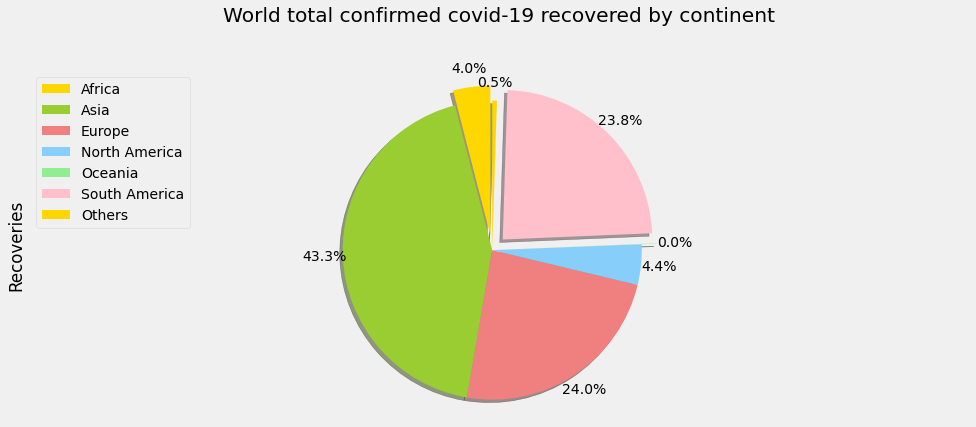

In [ ]:
problem13_continent['Recoveries'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )
plt.title('World total confirmed covid-19 recovered by continent', y=1.12) 
plt.axis('equal') 
plt.legend(labels=problem13_continent.index, loc='upper left')

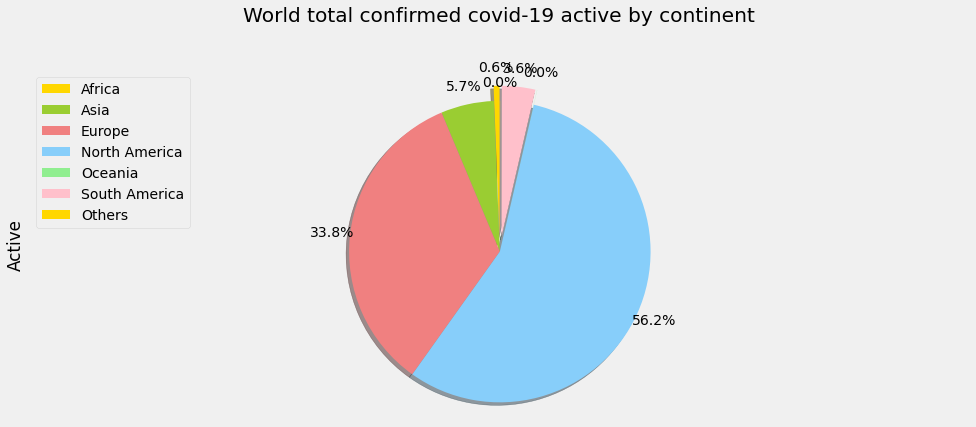

In [ ]:
problem13_continent['Active'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )
plt.title('World total confirmed covid-19 active by continent', y=1.12) 
plt.axis('equal') 
plt.legend(labels=problem13_continent.index, loc='upper left') 


In [ ]:
#Insert your code here:


# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [ ]:
world_map = folium.Map()
# add Circle one by one on the map
for i in range(len(countries_df)):
    # Country information
    country_name = countries_df.index[i]
    latitude = countries_df.iloc[i]['Lat']
    longtitude = countries_df.iloc[i]['Long']
    confirmed = countries_df.iloc[i]['Confirmed']
    deaths = countries_df.iloc[i]['Deaths']
    recoveries = countries_df.iloc[i]['Recoveries']
    mortality_rate = countries_df.iloc[i]['Mortality Rate']
    
    # Create html text
    html=f"""
            <div>
                <h5 style="text-align: center;"><b>{country_name}</b></h5>
                <hr style="margin: 0 0 10px 0">
                <li style="list-style:circle;">Confirmed: {confirmed}</li>
                <li style="list-style:circle;">Deaths: {deaths}</li>
                <li style="list-style:circle;">Recovered: {recoveries}</li>
                <li style="list-style:circle;">Mortality Rate: {mortality_rate}</li>
            </div>
          """
    
    # add Circle to the map
    folium.Circle(
        location=[latitude, longtitude],
        tooltip=html,
        radius=float(confirmed)/10,
        color='#FC7F03',
        fill=True,
        fill_color='#FC7F03'
    ).add_to(world_map)
    
    
# Show the word map
world_map

In [ ]:
#Insert your code here:




# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [ ]:
#Insert your code here:



In [ ]:
#Insert your code here:
# List of active cases by countries
countries_active_cases = countries_df[['Lat', 'Long', 'Active']].copy()

# Remove all 0 value in Active column
countries_active_cases['Active'].replace(0, np.NaN, inplace=True)
countries_active_cases.dropna(inplace=True)

# Calculate log10 of Countries's Activie Case
countries_active_cases['Log10 Active'] = np.log10(countries_active_cases['Active'])

countries_active_cases

Lat        Long   Active  Log10 Active
Country/Region                                                  
Afghanistan         33.939110   67.709953  11265.0      4.051731
Albania             41.153300   20.168300    433.0      2.636488
Algeria             28.033900    1.659600  35602.0      4.551474
Andorra             42.506300    1.521800    142.0      2.152288
Angola             -11.202700   17.873900   5706.0      3.756332
...                       ...         ...      ...           ...
Vietnam             14.058324  108.277199   4356.0      3.639088
West Bank and Gaza  31.952200   35.233200   4077.0      3.610341
Yemen               15.552727   48.516388   1976.0      3.295787
Zambia             -13.133897   27.849332   2026.0      3.306639
Zimbabwe           -19.015438   29.154857    773.0      2.888179

[182 rows x 4 columns]

In [ ]:
fig1 = px.choropleth(countries_active_cases, 
                    locations = countries_active_cases.index, 
                    locationmode = 'country names' , 
                    color = countries_active_cases.index, 
                    hover_data =['Lat', 'Long', 'Active', 'Log10 Active'])
fig1.show()

# Problem 16
    Filter the top 10 countries based on the number of confirmed cases.

In [ ]:
#Insert your code here:

In [ ]:
problem16_top10_df=countries_df.sort_values(by='Confirmed',ascending=False).head(10)
problem16_top10_df

Lat        Long     Continents  Confirmed  Deaths  \
Country/Region                                                            
USA             40.000000 -100.000000  North America   33375918  590209   
India           20.593684   78.962880           Asia   28175044  331895   
Brazil         -14.235000  -51.925300  South America   16557888  463244   
France           3.933900  -53.125800         Europe    5728909  109693   
Turkey          38.963700   35.243300           Asia    5249404   47527   
Russia          61.524010  105.318756         Europe    5013512  119464   
United Kingdom  18.220600  -63.068600         Europe    4503229  128045   
Italy           41.871940   12.567380         Europe    4217821  126128   
Argentina      -38.416100  -63.616700  South America    3781784   78093   
Germany         51.165691   10.451526         Europe    3681126   88442   

                Recoveries    Active  Mortality Rate  Recoveries Rate  
Country/Region                                                         
USA                      0  32785709            1.77         0.000000  
India             25947629   1895520            1.18        92.094369  
Brazil            14586009   1508635            2.80        88.090999  
France              391670   5227546            1.91         6.836729  
Turkey             5114624     87253            0.91        97.432470  
Russia             4630461    263587            2.38        92.359627  
United Kingdom       15507   4359677            2.84         0.344353  
Italy              3858019    233674            2.99        91.469482  
Argentina          3350602    353089            2.06        88.598450  
Germany            3498580     94104            2.40        95.041028

In [ ]:
top10_confirmed_countries=countries_df.sort_values(by='Confirmed',ascending=False).head(10)
top10_confirmed_countries

Lat        Long     Continents  Confirmed  Deaths  \
Country/Region                                                            
USA             40.000000 -100.000000  North America   33375918  590209   
India           20.593684   78.962880           Asia   28175044  331895   
Brazil         -14.235000  -51.925300  South America   16557888  463244   
France           3.933900  -53.125800         Europe    5728909  109693   
Turkey          38.963700   35.243300           Asia    5249404   47527   
Russia          61.524010  105.318756         Europe    5013512  119464   
United Kingdom  18.220600  -63.068600         Europe    4503229  128045   
Italy           41.871940   12.567380         Europe    4217821  126128   
Argentina      -38.416100  -63.616700  South America    3781784   78093   
Germany         51.165691   10.451526         Europe    3681126   88442   

                Recoveries    Active  Mortality Rate  Recoveries Rate  
Country/Region                                                         
USA                      0  32785709            1.77         0.000000  
India             25947629   1895520            1.18        92.094369  
Brazil            14586009   1508635            2.80        88.090999  
France              391670   5227546            1.91         6.836729  
Turkey             5114624     87253            0.91        97.432470  
Russia             4630461    263587            2.38        92.359627  
United Kingdom       15507   4359677            2.84         0.344353  
Italy              3858019    233674            2.99        91.469482  
Argentina          3350602    353089            2.06        88.598450  
Germany            3498580     94104            2.40        95.041028

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

In [ ]:
#Insert your code here:


In [ ]:
problem17_total = problem16_top10_df.copy(deep = True)
problem17_total

Lat        Long     Continents  Confirmed  Deaths  \
Country/Region                                                            
USA             40.000000 -100.000000  North America   33375918  590209   
India           20.593684   78.962880           Asia   28175044  331895   
Brazil         -14.235000  -51.925300  South America   16557888  463244   
France           3.933900  -53.125800         Europe    5728909  109693   
Turkey          38.963700   35.243300           Asia    5249404   47527   
Russia          61.524010  105.318756         Europe    5013512  119464   
United Kingdom  18.220600  -63.068600         Europe    4503229  128045   
Italy           41.871940   12.567380         Europe    4217821  126128   
Argentina      -38.416100  -63.616700  South America    3781784   78093   
Germany         51.165691   10.451526         Europe    3681126   88442   

                Recoveries    Active  Mortality Rate  Recoveries Rate  
Country/Region                                                         
USA                      0  32785709            1.77         0.000000  
India             25947629   1895520            1.18        92.094369  
Brazil            14586009   1508635            2.80        88.090999  
France              391670   5227546            1.91         6.836729  
Turkey             5114624     87253            0.91        97.432470  
Russia             4630461    263587            2.38        92.359627  
United Kingdom       15507   4359677            2.84         0.344353  
Italy              3858019    233674            2.99        91.469482  
Argentina          3350602    353089            2.06        88.598450  
Germany            3498580     94104            2.40        95.041028

In [ ]:
problem17_total = problem17_total.drop(columns = ['Lat','Long','Mortality Rate', 'Continents','Confirmed' ])
problem17_total

Deaths  Recoveries    Active  Recoveries Rate
Country/Region                                               
USA             590209           0  32785709         0.000000
India           331895    25947629   1895520        92.094369
Brazil          463244    14586009   1508635        88.090999
France          109693      391670   5227546         6.836729
Turkey           47527     5114624     87253        97.432470
Russia          119464     4630461    263587        92.359627
United Kingdom  128045       15507   4359677         0.344353
Italy           126128     3858019    233674        91.469482
Argentina        78093     3350602    353089        88.598450
Germany          88442     3498580     94104        95.041028

In [ ]:
problem17_total

Deaths  Recoveries    Active  Recoveries Rate
Country/Region                                               
USA             590209           0  32785709         0.000000
India           331895    25947629   1895520        92.094369
Brazil          463244    14586009   1508635        88.090999
France          109693      391670   5227546         6.836729
Turkey           47527     5114624     87253        97.432470
Russia          119464     4630461    263587        92.359627
United Kingdom  128045       15507   4359677         0.344353
Italy           126128     3858019    233674        91.469482
Argentina        78093     3350602    353089        88.598450
Germany          88442     3498580     94104        95.041028

In [ ]:
problem17_total = problem17_total.reset_index()
problem17_total

Country/Region  Deaths  Recoveries    Active  Recoveries Rate
0             USA  590209           0  32785709         0.000000
1           India  331895    25947629   1895520        92.094369
2          Brazil  463244    14586009   1508635        88.090999
3          France  109693      391670   5227546         6.836729
4          Turkey   47527     5114624     87253        97.432470
5          Russia  119464     4630461    263587        92.359627
6  United Kingdom  128045       15507   4359677         0.344353
7           Italy  126128     3858019    233674        91.469482
8       Argentina   78093     3350602    353089        88.598450
9         Germany   88442     3498580     94104        95.041028

<AxesSubplot:title={'center':'Stacked Bar Graph by dataframe'}, ylabel='Country/Region'>

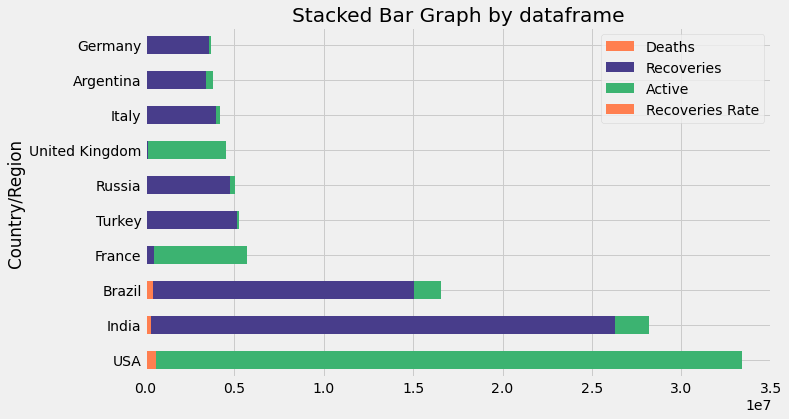

In [ ]:

problem17_total.plot(x='Country/Region' , kind='barh', stacked=True,figsize=(10, 6),color=['coral', 'darkslateblue', 'mediumseagreen'],
        title='Stacked Bar Graph by dataframe')



# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

In [ ]:
#No. According to the global Covid 19 Data, The pandemic chart is still tend to be more increasing and might not reached the peak yet. 

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


In [ ]:

#19.1 South American is the continent has the highest death rate over active case (55.88%)
    

#19.3 Australia is the continent has the highest recoveries rate over continents' dataset (95.44%)

# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

In [ ]:
#20.1 Vanuatu has the highest death rate over countries dataset (25 %)

#20.3 Group of countries have lower covid case with no covid deaths case have the most recoveries rate (equal 1): Solomon Islands, Micronesia, Marshall Islands, Holy See, Samoa 

# Problem 21
**USA dataset**

In [ ]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

In [ ]:
us_medical_data

Province_State Country_Region          Last_Update      Lat  \
0                    Alabama             US  2020-07-07 04:34:13  32.3182   
1                     Alaska             US  2020-07-07 04:34:13  61.3707   
2             American Samoa             US  2020-07-07 04:34:13 -14.2710   
3                    Arizona             US  2020-07-07 04:34:13  33.7298   
4                   Arkansas             US  2020-07-07 04:34:13  34.9697   
5                 California             US  2020-07-07 04:34:13  36.1162   
6                   Colorado             US  2020-07-07 04:34:13  39.0598   
7                Connecticut             US  2020-07-07 04:34:13  41.5978   
8                   Delaware             US  2020-07-07 04:34:13  39.3185   
9           Diamond Princess             US  2020-07-07 04:34:13      NaN   
10      District of Columbia             US  2020-07-07 04:34:13  38.8974   
11                   Florida             US  2020-07-07 04:34:13  27.7663   
12                   Georgia             US  2020-07-07 04:34:13  33.0406   
13            Grand Princess             US  2020-07-07 04:34:13      NaN   
14                      Guam             US  2020-07-07 04:34:13  13.4443   
15                    Hawaii             US  2020-07-07 04:34:13  21.0943   
16                     Idaho             US  2020-07-07 04:34:13  44.2405   
17                  Illinois             US  2020-07-07 04:34:13  40.3495   
18                   Indiana             US  2020-07-07 04:34:13  39.8494   
19                      Iowa             US  2020-07-07 04:34:13  42.0115   
20                    Kansas             US  2020-07-07 04:34:13  38.5266   
21                  Kentucky             US  2020-07-07 04:34:13  37.6681   
22                 Louisiana             US  2020-07-07 04:34:13  31.1695   
23                     Maine             US  2020-07-07 04:34:13  44.6939   
24                  Maryland             US  2020-07-07 04:34:13  39.0639   
25             Massachusetts             US  2020-07-07 04:34:13  42.2302   
26                  Michigan             US  2020-07-07 04:34:13  43.3266   
27                 Minnesota             US  2020-07-07 04:34:13  45.6945   
28               Mississippi             US  2020-07-07 04:34:13  32.7416   
29                  Missouri             US  2020-07-07 04:34:13  38.4561   
30                   Montana             US  2020-07-07 04:34:13  46.9219   
31                  Nebraska             US  2020-07-07 04:34:13  41.1254   
32                    Nevada             US  2020-07-07 04:34:13  38.3135   
33             New Hampshire             US  2020-07-07 04:34:13  43.4525   
34                New Jersey             US  2020-07-07 04:34:13  40.2989   
35                New Mexico             US  2020-07-07 04:34:13  34.8405   
36                  New York             US  2020-07-07 04:34:13  42.1657   
37            North Carolina             US  2020-07-07 04:34:13  35.6301   
38              North Dakota             US  2020-07-07 04:34:13  47.5289   
39  Northern Mariana Islands             US  2020-07-07 04:34:13  15.0979   
40                      Ohio             US  2020-07-07 04:34:13  40.3888   
41                  Oklahoma             US  2020-07-07 04:34:13  35.5653   
42                    Oregon             US  2020-07-07 04:34:13  44.5720   
43              Pennsylvania             US  2020-07-07 04:34:13  40.5908   
44               Puerto Rico             US  2020-07-07 04:34:13  18.2208   
45              Rhode Island             US  2020-07-07 04:34:13  41.6809   
46            South Carolina             US  2020-07-07 04:34:13  33.8569   
47              South Dakota             US  2020-07-07 04:34:13  44.2998   
48                 Tennessee             US  2020-07-07 04:34:13  35.7478   
49                     Texas             US  2020-07-07 04:34:13  31.0545   
50                      Utah             US  2020-07-07 04:34:13  40.1500   
51        

In [ ]:
#Insert your code here:

In [ ]:
highest_death_rate = us_medical_data.sort_values(by=['Mortality_Rate'],ascending=False).dropna().head(1)
highest_death_rate

Province_State Country_Region          Last_Update      Lat    Long_  \
7    Connecticut             US  2020-07-07 04:34:13  41.5978 -72.7554   

   Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
7      46976    4338     8210.0  34428.0     9    1317.593787       524364.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
7              10411.0        9.234503  84000009  USA  14707.483577   

   Hospitalization_Rate  
7             22.162381

In [ ]:
highest_rate_on_COVID2019_spread_rate = us_medical_data.sort_values(by=['Incident_Rate'],ascending=False).dropna().head(1)
highest_rate_on_COVID2019_spread_rate

Province_State Country_Region          Last_Update      Lat    Long_  \
36       New York             US  2020-07-07 04:34:13  42.1657 -74.9481   

    Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  \
36     397649   32057    71040.0  294552.0    36    2044.093624   

    People_Tested  People_Hospitalized  Mortality_Rate       UID ISO3  \
36      4288131.0              89995.0        8.061632  84000036  USA   

    Testing_Rate  Hospitalization_Rate  
36  22042.910293             22.631768

In [ ]:
us_medical_data['Recoveries_Rate'] = (us_medical_data['Recovered']/us_medical_data['Confirmed'])


In [ ]:
highest_recoveries_rate = us_medical_data.sort_values(by=['Recoveries_Rate'],ascending=False).dropna().head(1)
highest_recoveries_rate

Province_State Country_Region          Last_Update      Lat    Long_  \
27      Minnesota             US  2020-07-07 04:34:13  45.6945 -93.9002   

    Confirmed  Deaths  Recovered  Active  FIPS  Incident_Rate  People_Tested  \
27      38569    1511    33907.0  3151.0    27      683.89214       679693.0   

    People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
27               4219.0        3.917654  84000027  USA  12052.080703   

    Hospitalization_Rate  Recoveries_Rate  
27             10.938837         0.879126

# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [ ]:
#Insert your code here:

In [ ]:
top10_states_confirmed = us_medical_data.sort_values(by=['Confirmed'],ascending=False).head(10)
top10_states_confirmed

Province_State Country_Region          Last_Update      Lat     Long_  \
36       New York             US  2020-07-07 04:34:13  42.1657  -74.9481   
5      California             US  2020-07-07 04:34:13  36.1162 -119.6816   
11        Florida             US  2020-07-07 04:34:13  27.7663  -81.6868   
49          Texas             US  2020-07-07 04:34:13  31.0545  -97.5635   
34     New Jersey             US  2020-07-07 04:34:13  40.2989  -74.5210   
17       Illinois             US  2020-07-07 04:34:13  40.3495  -88.9861   
25  Massachusetts             US  2020-07-07 04:34:13  42.2302  -71.5301   
3         Arizona             US  2020-07-07 04:34:13  33.7298 -111.4312   
12        Georgia             US  2020-07-07 04:34:13  33.0406  -83.6431   
43   Pennsylvania             US  2020-07-07 04:34:13  40.5908  -77.2098   

    Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  \
36     397649   32057    71040.0  294552.0    36    2044.093624   
5      284364    6367        NaN       NaN     6     719.589986   
11     206447    3778        NaN       NaN    12     961.213930   
49     204534    2872   103782.0   97880.0    48     705.389845   
34     174766   15229    30729.0  128808.0    34    1967.600333   
17     147865    7026        NaN       NaN    17    1166.880435   
25     110137    8198    93157.0    8782.0    25    1597.924586   
3      101455    1829    11836.0   87790.0     4    1393.858286   
12      97064    2878        NaN       NaN    13     914.195469   
43      94439    6762    70437.0   17240.0    42     737.690057   

    People_Tested  People_Hospitalized  Mortality_Rate       UID ISO3  \
36      4288131.0              89995.0        8.061632  84000036  USA   
5       4793353.0                  NaN        2.233000  84000006  USA   
11      3559399.0              16352.0        1.830010  84000012  USA   
49      2163729.0                  NaN        1.404168  84000048  USA   
34      1549209.0              20237.0        8.713937  84000034  USA   
17      1783962.0                  NaN        4.751632  84000017  USA   
25       899417.0              11469.0        7.443457  84000025  USA   
3        873294.0               5188.0        1.802770  84000004  USA   
12       958953.0              11919.0        2.965054  84000013  USA   
43      1018320.0                  NaN        7.160177  84000042  USA   

    Testing_Rate  Hospitalization_Rate  Recoveries_Rate  
36  22042.910293             22.631768         0.178650  
5   12131.316935                   NaN              NaN  
11  16572.504822              7.920677              NaN  
49   7462.194372                   NaN         0.507407  
34  17441.745786             11.656519         0.175829  
17  14078.181818                   NaN              NaN  
25  13049.207233             10.413394         0.845828  
3    8488.322873              5.113597         0.116663  
12   9031.880900             12.279527              NaN  
43   6509.332261                   NaN         0.745847

Text(0.5, 1.0, ' Top 10 states')

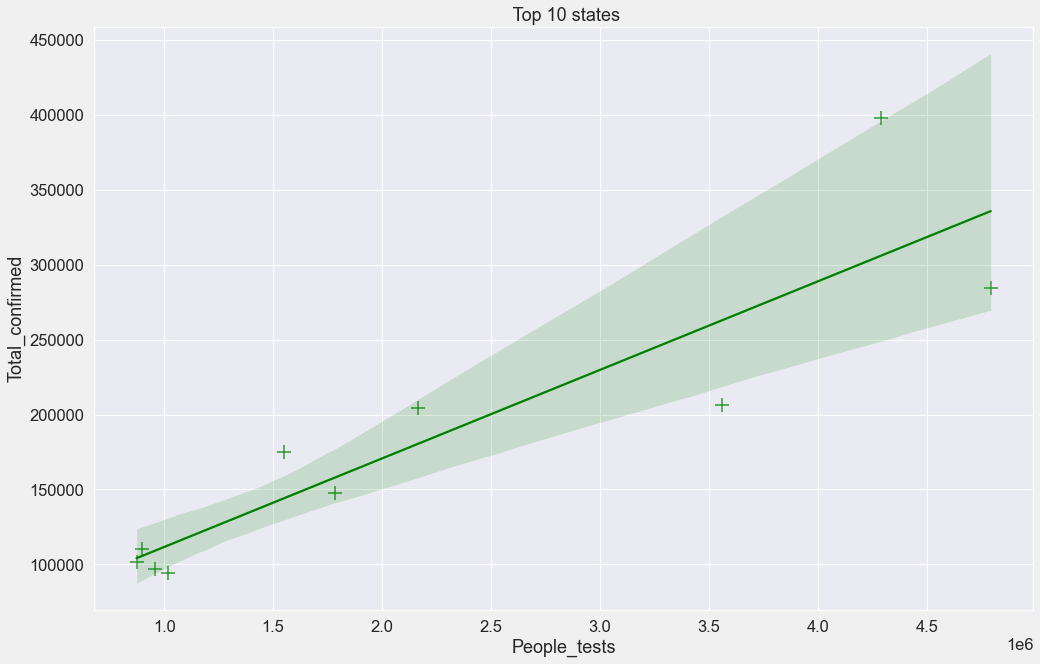

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
ax = sns.regplot(x="People_Tested", y="Confirmed", data=top10_states_confirmed, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='People_tests', ylabel='Total_confirmed')
ax.set_title(' Top 10 states')